# Lab 7- Data Analysis

Exercises 1-4 are to be completed by Match 29th. The remaider of the lab is due April 5th. Before leaving lab today, everyone must download the dataset.

## Exercise 1: Reading

### HiggsML
In 2014, some of my colleagues from the ATLAS experiment put together a Higgs Machine Learning Challenge, which was hosted on [Kaggle](https://www.kaggle.com). Please read sections 1 and 3 (skip/skim 2) of [The HiggsML Technical Documentation](https://higgsml.lal.in2p3.fr/files/2014/04/documentation_v1.8.pdf). 

Kaggle is a platform for data science competitions, with cash awards for winners. Kaggle currently hosts over 50,000 public datasets and associated competitions. Later in the course we will look at a variety of problems hosted on Kaggle and similar platforms. 

### SUSY Dataset

For the next few labs we will use datasets used in the [first paper on Deep Learning in High Energy physics](https://arxiv.org/pdf/1402.4735.pdf). Please read up to the "Deep Learning" section (end of page 5). This paper demonstrates that Deep Neural Networks can learn from raw data the features that are typically used by physicists for searches for exotics particles. The authors provide the data they used for this paper. They considered two benchmark scenarios: Higgs and SUSY.

## Exercise 2: Download SUSY Dataset

The information about the dataset can be found at the [UCI Machine Learning Repository](https://archive.ics.uci.edu/ml/index.php). We'll start with the [SUSY Dataset](https://archive.ics.uci.edu/ml/datasets/SUSY). 

### Download
In a terminal, download the data directly from the source and then decompress it. For example:

* To download:
    * On Mac OS: 
    `curl http://archive.ics.uci.edu/ml/machine-learning-databases/00279/SUSY.csv.gz > SUSY.csv.gz`

    * In linux:
    `wget http://archive.ics.uci.edu/ml/machine-learning-databases/00279/SUSY.csv.gz`

* To uncompress:
`gunzip SUSY.csv.gz`

## Downloading the file
!wget http://archive.ics.uci.edu/ml/machine-learning-databases/00279/SUSY.csv.gz

## Unzipping the fie
!gunzip SUSY.csv.gz


In [1]:
ls -lh

total 2.3G
-rwxrwxrwx 1 maryamajibola_elias maryamajibola_elias 1.6M Mar 28 00:15 Lab.7-solutions.ipynb*
-rwxrwxrwx 1 maryamajibola_elias maryamajibola_elias 387K Mar 22 11:41 Lab.7.ipynb*
-rwxrwxrwx 1 maryamajibola_elias maryamajibola_elias 6.2M Mar 22 11:41 Lab.7.pdf*
-rwxrwxrwx 1 maryamajibola_elias maryamajibola_elias 2.3G Mar 22 11:55 SUSY.csv*


The data is provided as a comma separated file.

In [2]:
filename="SUSY.csv"
# print out the first 5 lines using unix head command
!head -5  "SUSY.csv"

0.000000000000000000e+00,9.728614687919616699e-01,6.538545489311218262e-01,1.176224589347839355e+00,1.157156467437744141e+00,-1.739873170852661133e+00,-8.743090629577636719e-01,5.677649974822998047e-01,-1.750000417232513428e-01,8.100607395172119141e-01,-2.525521218776702881e-01,1.921887040138244629e+00,8.896374106407165527e-01,4.107718467712402344e-01,1.145620822906494141e+00,1.932632088661193848e+00,9.944640994071960449e-01,1.367815494537353516e+00,4.071449860930442810e-02
1.000000000000000000e+00,1.667973041534423828e+00,6.419061869382858276e-02,-1.225171446800231934e+00,5.061022043228149414e-01,-3.389389812946319580e-01,1.672542810440063477e+00,3.475464344024658203e+00,-1.219136357307434082e+00,1.295456290245056152e-02,3.775173664093017578e+00,1.045977115631103516e+00,5.680512785911560059e-01,4.819284379482269287e-01,0.000000000000000000e+00,4.484102725982666016e-01,2.053557634353637695e-01,1.321893453598022461e+00,3.775840103626251221e-01
1.000000000000000000e+00,4.4483992457389831

### First Look

Each row represents a LHC collision event. Each column contains some observable from that event. The variable names are ([based on documentation](https://archive.ics.uci.edu/ml/datasets/SUSY)):

In [3]:
VarNames=["signal", "l_1_pT", "l_1_eta","l_1_phi", "l_2_pT", "l_2_eta", "l_2_phi", "MET", "MET_phi", "MET_rel", "axial_MET", "M_R", "M_TR_2", "R", "MT2", "S_R", "M_Delta_R", "dPhi_r_b", "cos_theta_r1"]

Some of these variables represent the "raw" kinematics of the observed final state particles, while others are "features" that are derived from these raw quantities:

In [4]:
RawNames=["l_1_pT", "l_1_eta","l_1_phi", "l_2_pT", "l_2_eta", "l_2_phi", "MET", "MET_phi"]
FeatureNames=list(set(VarNames[1:]).difference(RawNames))

In [5]:
RawNames

['l_1_pT',
 'l_1_eta',
 'l_1_phi',
 'l_2_pT',
 'l_2_eta',
 'l_2_phi',
 'MET',
 'MET_phi']

In [6]:
FeatureNames

['MET_rel',
 'M_Delta_R',
 'axial_MET',
 'MT2',
 'S_R',
 'M_R',
 'dPhi_r_b',
 'cos_theta_r1',
 'R',
 'M_TR_2']

We will use pandas to read in the file, and matplotlib to make plots. The following ensures pandas is installed and sets everything up:

In [7]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

Now we can read the data into a pandas dataframe:

In [8]:
filename = "SUSY.csv"
df = pd.read_csv(filename, dtype='float64', names=VarNames)

You can see the data in Jupyter by just evaluateing the dataframe:

In [9]:
df

,signal,l_1_pT,l_1_eta,l_1_phi,l_2_pT,l_2_eta,l_2_phi,MET,MET_phi,MET_rel,axial_MET,M_R,M_TR_2,R,MT2,S_R,M_Delta_R,dPhi_r_b,cos_theta_r1
0,0.0,0.972861,0.653855,1.176225,1.157156,-1.739873,-0.874309,0.567765,-0.175000,0.810061,-0.252552,1.921887,0.889637,0.410772,1.145621,1.932632,0.994464,1.367815,0.040714
1,1.0,1.667973,0.064191,-1.225171,0.506102,-0.338939,1.672543,3.475464,-1.219136,0.012955,3.775174,1.045977,0.568051,0.481928,0.000000,0.448410,0.205356,1.321893,0.377584
2,1.0,0.444840,-0.134298,-0.709972,0.451719,-1.613871,-0.768661,1.219918,0.504026,1.831248,-0.431385,0.526283,0.941514,1.587535,2.024308,0.603498,1.562374,1.135454,0.180910
3,1.0,0.381256,-0.976145,0.693152,0.448959,0.891753,-0.677328,2.033060,1.533041,3.046260,-1.005285,0.569386,1.015211,1.582217,1.551914,0.761215,1.715464,1.492257,0.090719
4,1.0,1.309996,-0.690089,-0.676259,1.589283,-0.693326,0.622907,1.087562,-0.381742,0.589204,1.365479,1.179295,0.968218,0.728563,0.000000,1.083158,0.043429,1.154854,0.094859
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4999995,1.0,0.853325,-0.961783,-1.487277,0.678190,0.493580,1.647969,1.843867,0.276954,1.025105,-1.486535,0.892879,1.684429,1.674084,3.366298,1.046707,2.646649,1.389226,0.364599
4999996,0.0,0.951581,0.139370,1.436884,0.880440,-0.351948,-0.740852,0.290863,-0.732360,0.001360,0.257738,0.802871,0.545319,0.602730,0.002998,0.748959,0.401166,0.443471,0.239953
4999997,0.0,0.840389,1.419162,-1.218766,1.195631,1.695645,0.663756,0.490888,-0.509186,0.704289,0.045744,0.825015,0.723530,0.778236,0.752942,0.838953,0.614048,1.210595,0.026692
4999998,1.0,1.784218,-0.833565,-0.560091,0.953342,-0.688969,-1.428233,2.660703,-0.861344,2.116892,2.906151,1.232334,0.952444,0.685846,0.000000,0.781874,0.676003,1.197807,0.093689


The first column stores the "truth" label of whether an event was signal or not. Pandas makes it easy to create dataframes that store only the signal or background events:

In [55]:
df_sig=df[df.signal==1]
df_bkg=df[df.signal==0]

The following example plots the signal and background distributions of every variable. Note that we use VarNames[1:] to skip the first variable, which was the true label.

In [11]:
df.dtypes

signal          float64
l_1_pT          float64
l_1_eta         float64
l_1_phi         float64
l_2_pT          float64
l_2_eta         float64
l_2_phi         float64
MET             float64
MET_phi         float64
MET_rel         float64
axial_MET       float64
M_R             float64
M_TR_2          float64
R               float64
MT2             float64
S_R             float64
M_Delta_R       float64
dPhi_r_b        float64
cos_theta_r1    float64
dtype: object

l_1_pT


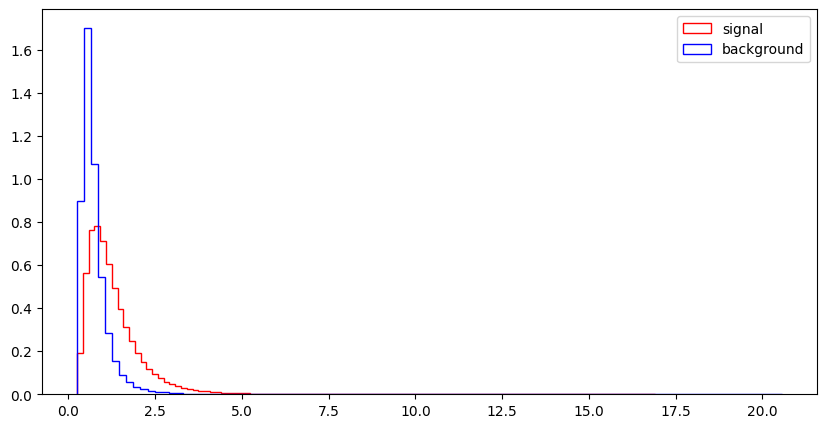

l_1_eta


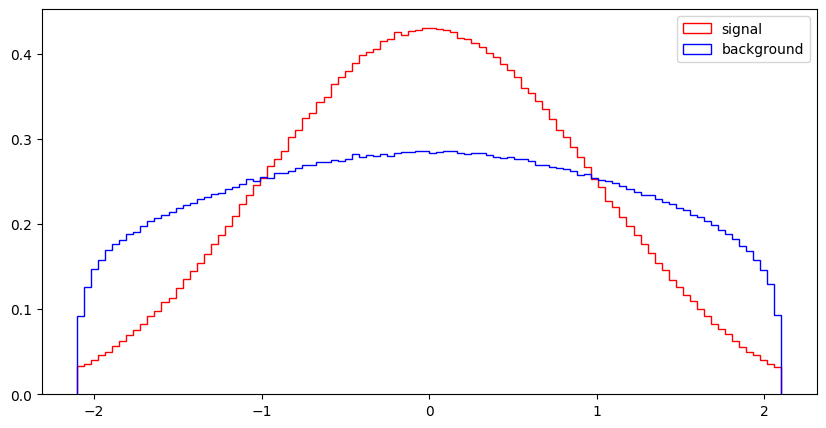

l_1_phi


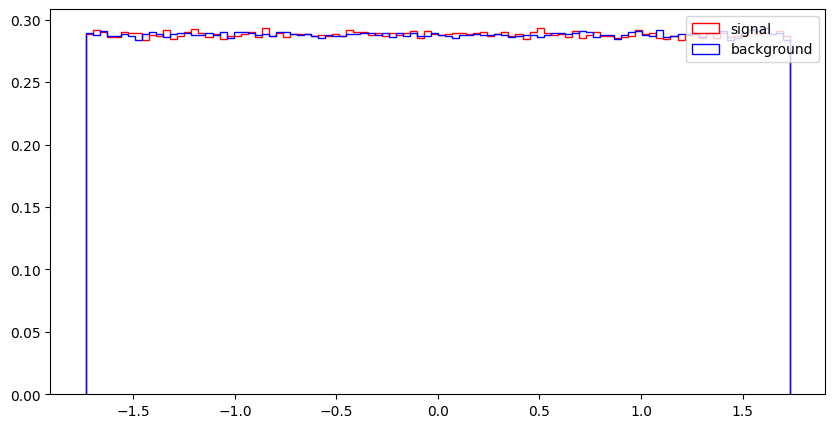

l_2_pT


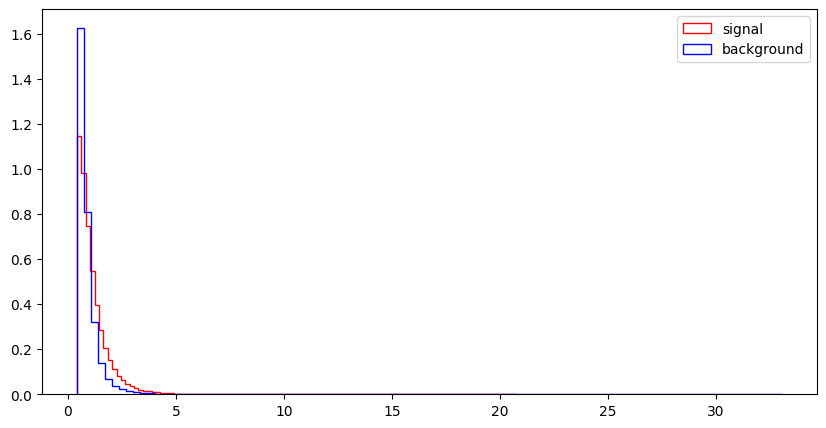

l_2_eta


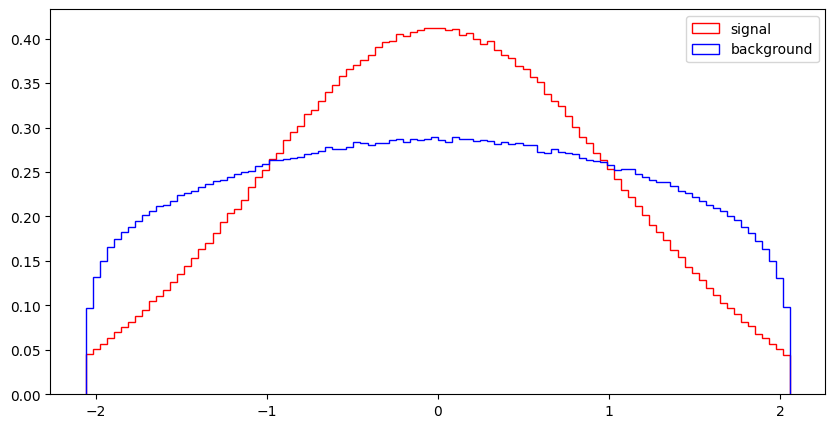

l_2_phi


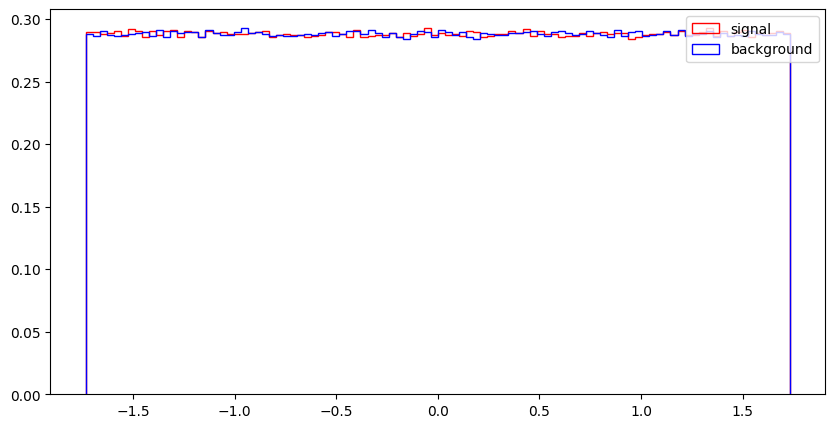

MET


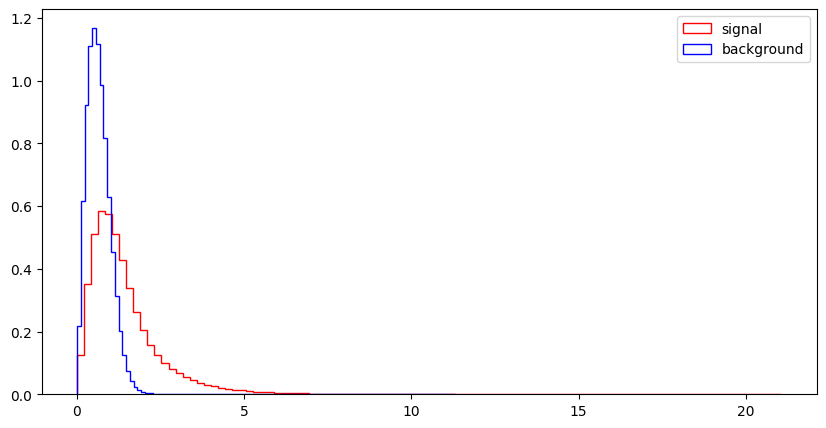

MET_phi


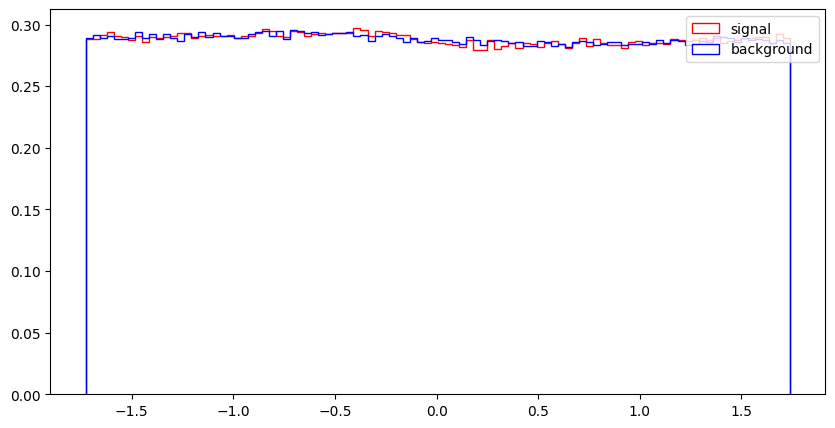

MET_rel


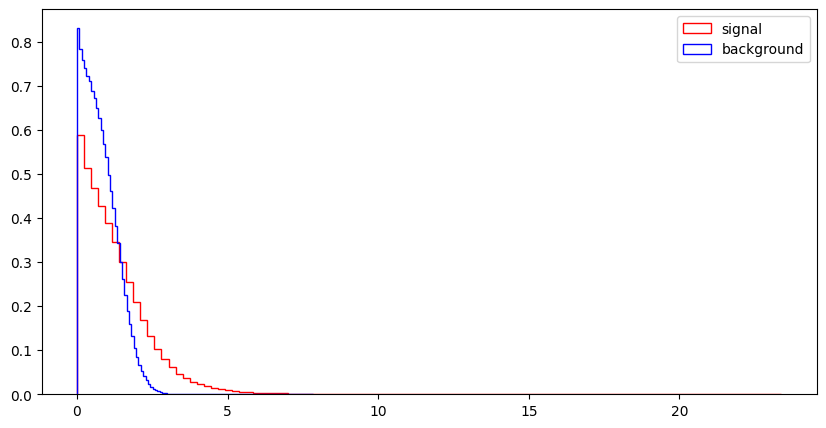

axial_MET


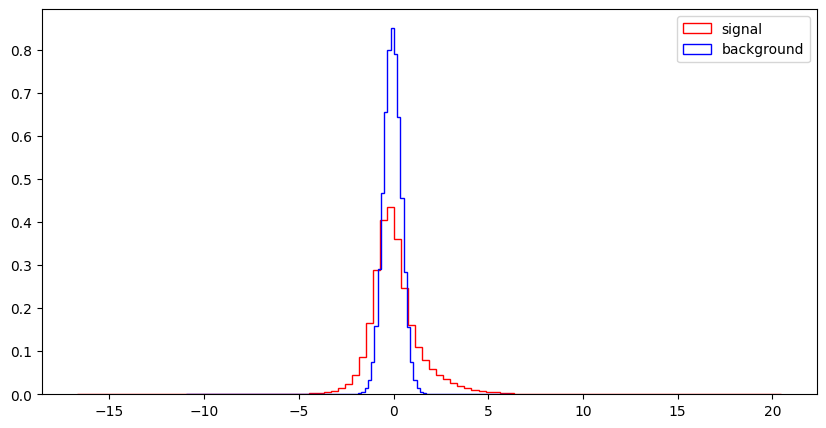

M_R


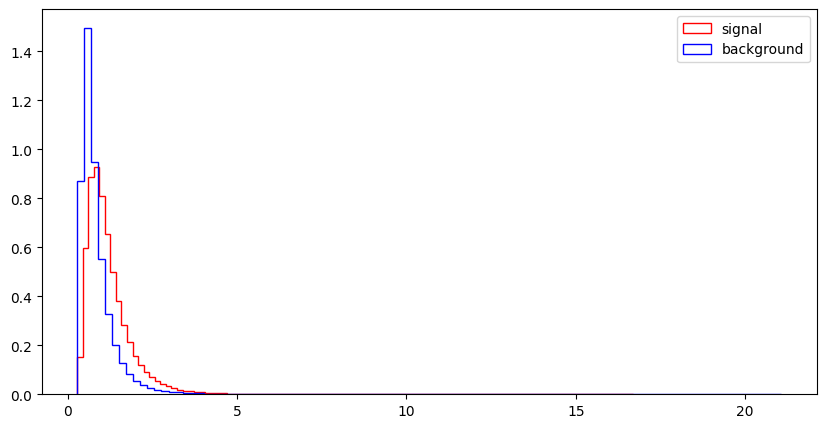

M_TR_2


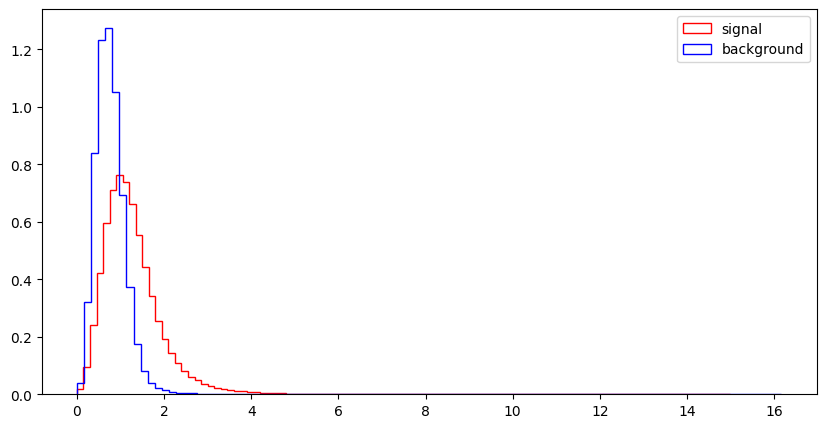

R


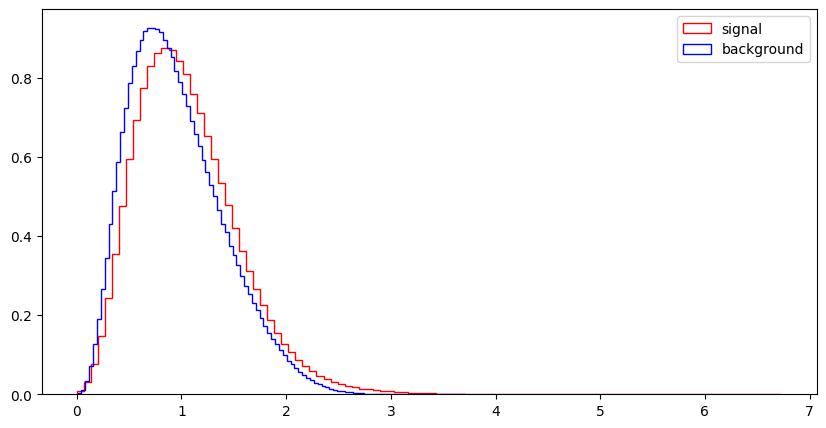

MT2


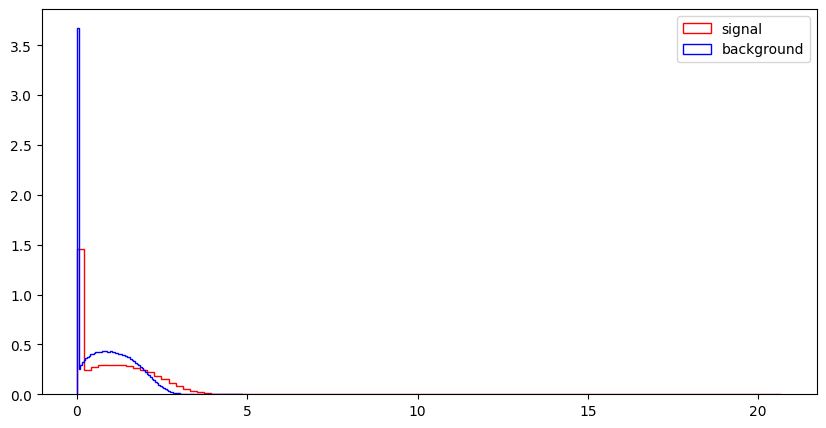

S_R


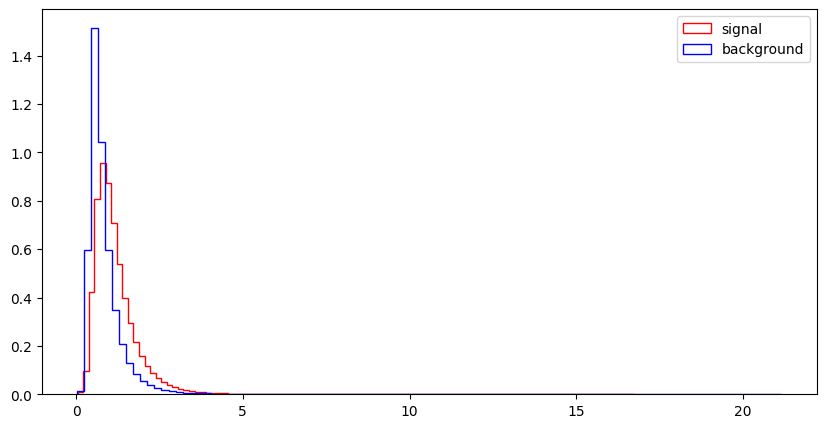

M_Delta_R


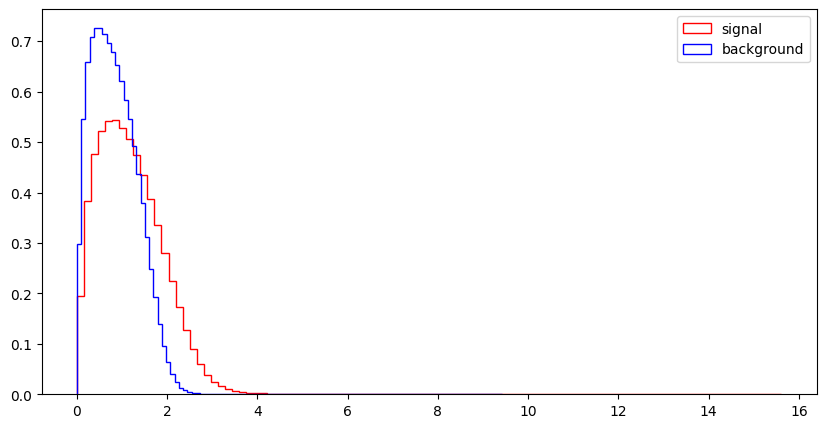

dPhi_r_b


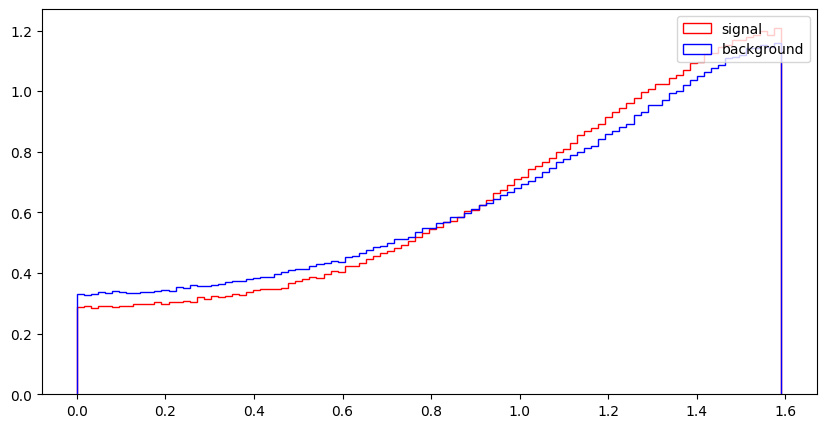

cos_theta_r1


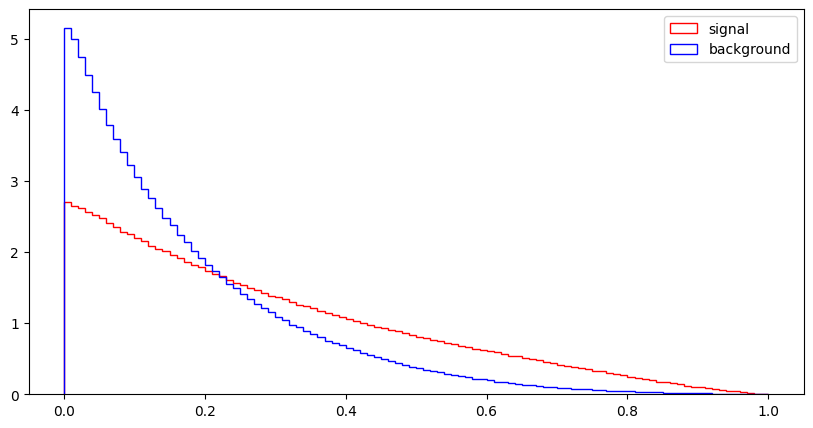

In [12]:
import numpy as np
for var in VarNames[1:]:
    print (var)
    plt.figure(figsize=(10,5))
    plt.hist(np.array(df_sig[var]),bins=100,histtype="step",color="red",label="signal",density=1, stacked=True)
    plt.hist(np.array(df_bkg[var]),bins=100,histtype="step", color="blue", label="background",density=1, stacked=True)
    plt.legend(loc='upper right')
    plt.show()

## Exercise 3: Make nice figures

Now use `matplotlib` to reproduce as closely as you can figures 5 and 6 from the paper. This exercise is intended to get you to familiarize yourself with making nicely formatted `matplotlib` figures with multiple plots. Note that the plots in the paper are actually wrong!

In [13]:
df.shape

(5000000, 19)

In [14]:
df.columns

Index(['signal', 'l_1_pT', 'l_1_eta', 'l_1_phi', 'l_2_pT', 'l_2_eta',
       'l_2_phi', 'MET', 'MET_phi', 'MET_rel', 'axial_MET', 'M_R', 'M_TR_2',
       'R', 'MT2', 'S_R', 'M_Delta_R', 'dPhi_r_b', 'cos_theta_r1'],
      dtype='object')

**Figure 5** :
Figure 5 on the paper are histograms of low-level input features for the SUSY benchmark, the histograms plot the distribution for the SUSY signal and background in these features; Looking at the features in my SUSY dataset, the low-level inputs are: [ 'l_1_pT', 'l_1_eta', 'l_1_phi', 'l_2_pT', 'l_2_eta',  'l_2_phi' 'MET', 'MET_phi' ],

l_1_pT


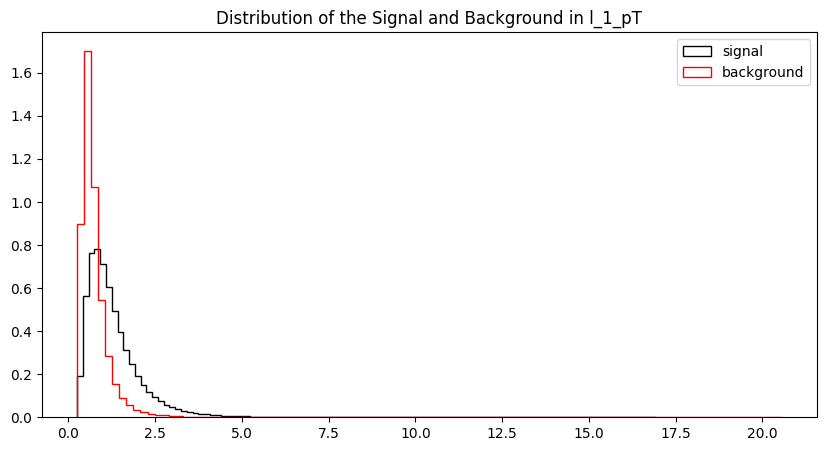

l_1_eta


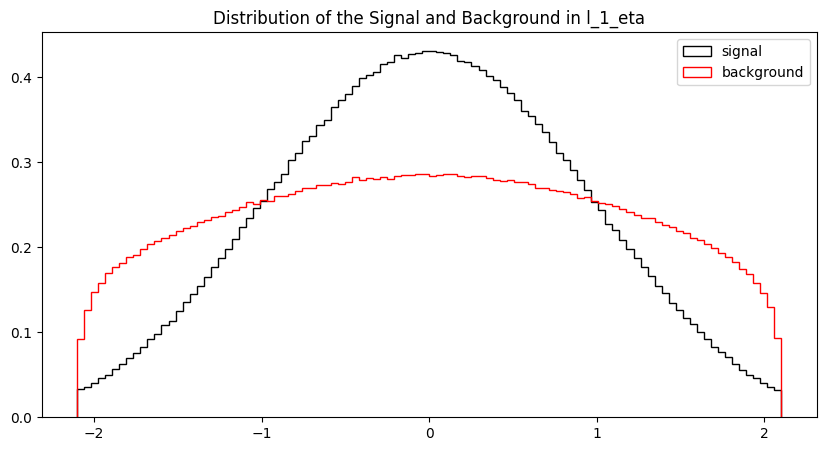

l_1_phi


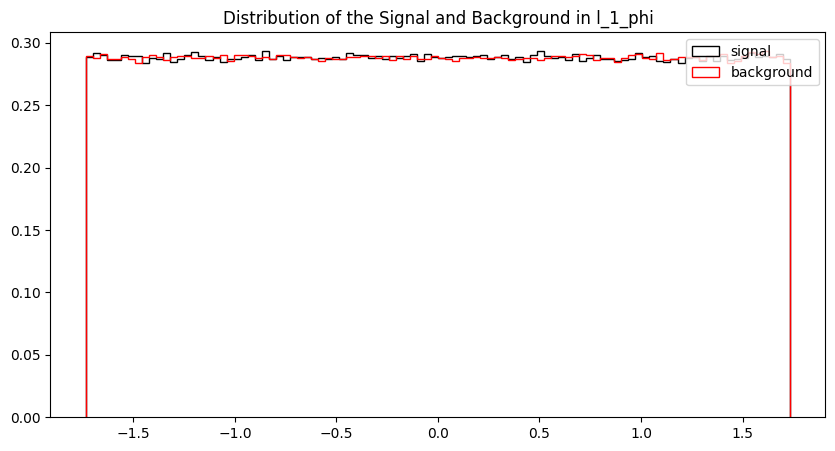

l_2_pT


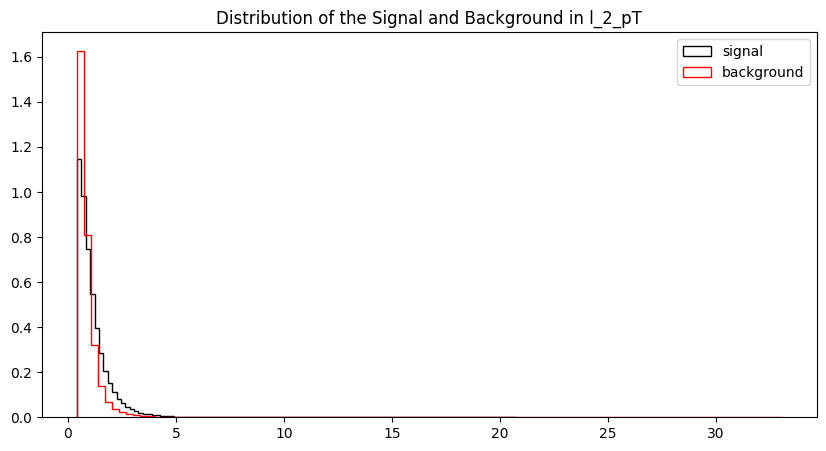

l_2_eta


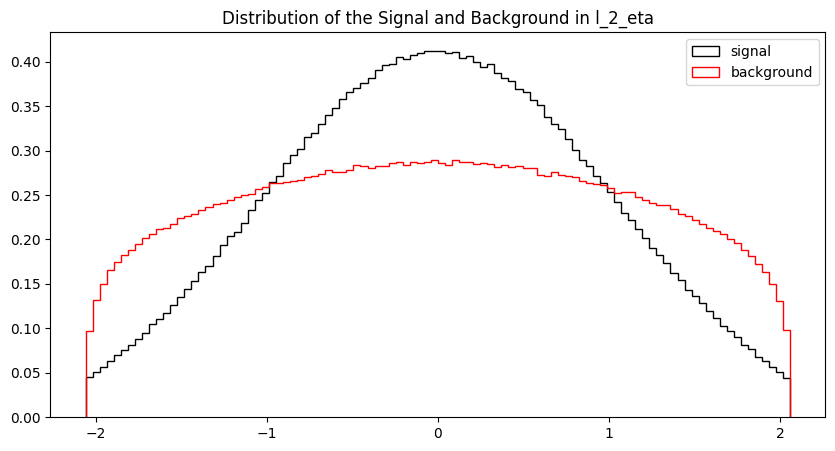

l_2_phi


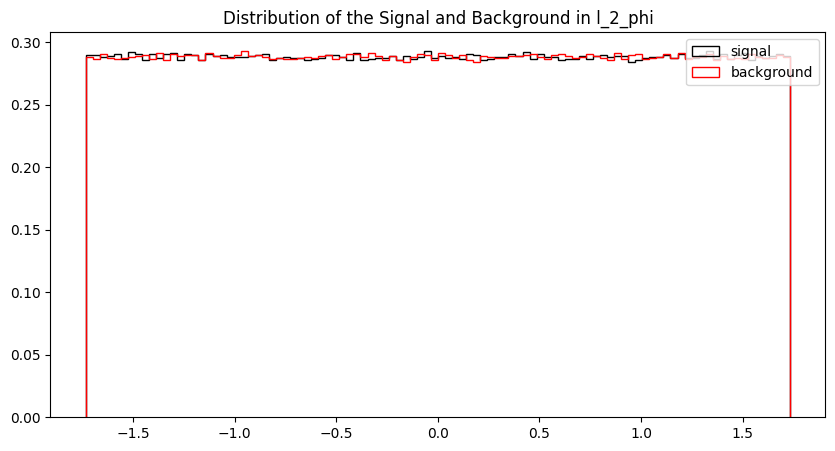

MET


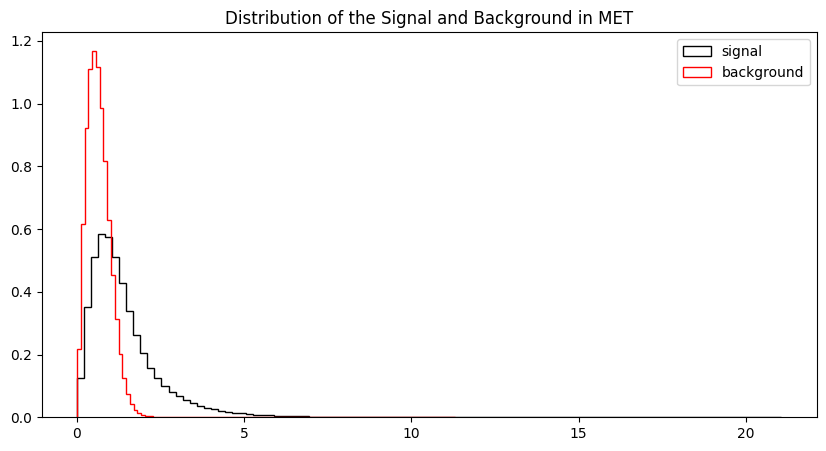

MET_phi


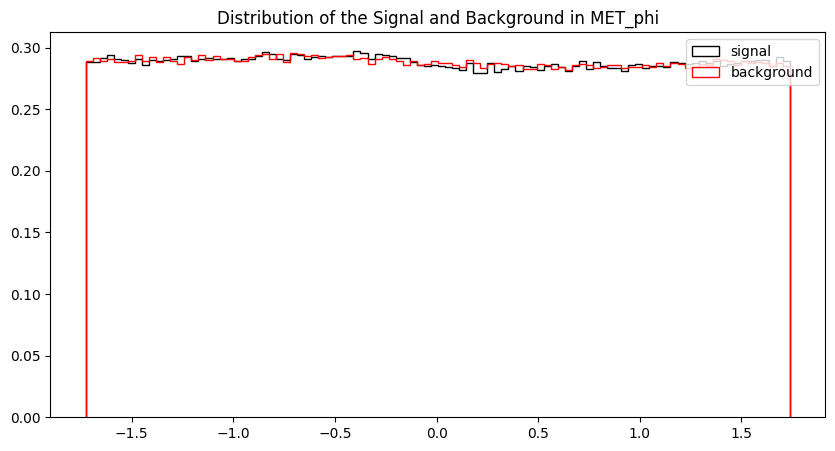

signal


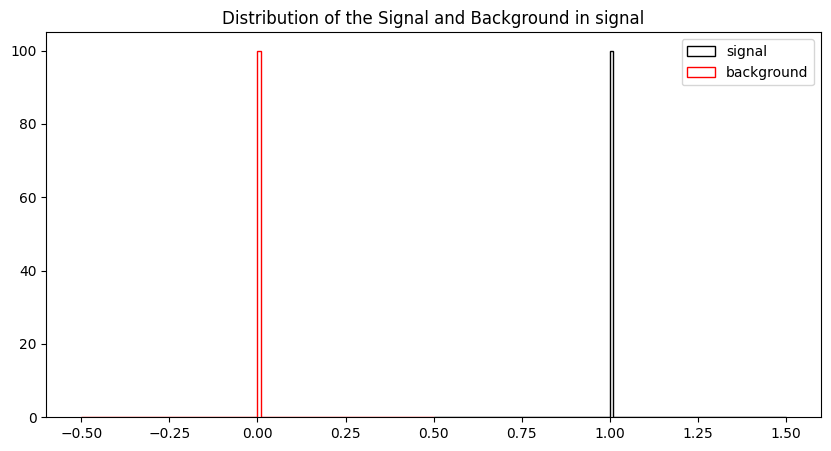

In [15]:
#### Making Fig 5 - low, level input feature 
###Creating a data frame with just the low_level input feature 
df_low = df[['l_1_pT', 'l_1_eta', 'l_1_phi', 'l_2_pT', 'l_2_eta', 'l_2_phi', 'MET', 'MET_phi', 'signal']]
### Plotting the histograms of the low level feature with the sig/bkg distribution
for col in df_low.columns:
    print (col)
    plt.figure(figsize=(10,5))
    plt.hist(np.array(df_sig[col]),bins=100,histtype="step",
             color="black",label="signal",density=1, stacked=True)
    plt.hist(np.array(df_bkg[col]),bins=100,histtype="step", 
             color="red", label="background",density=1, stacked=True)
    plt.title(f"Distribution of the Signal and Background in {col}")
    plt.legend(loc='upper right')
    plt.show()

**Figure 6**:
Figure 6 on the paper are histograms of high-level input features for the SUSY benchmark, the histograms plot the distribution for the SUSY signal and background in these features; Looking at the features in my SUSY dataset, the high-level inputs are: ['MET_rel', 'axial_MET', 'M_R', 'M_TR_2',
       'R', 'MT2', 'S_R', 'M_Delta_R', 'dPhi_r_b', 'cos_theta_r1]')

MET_rel


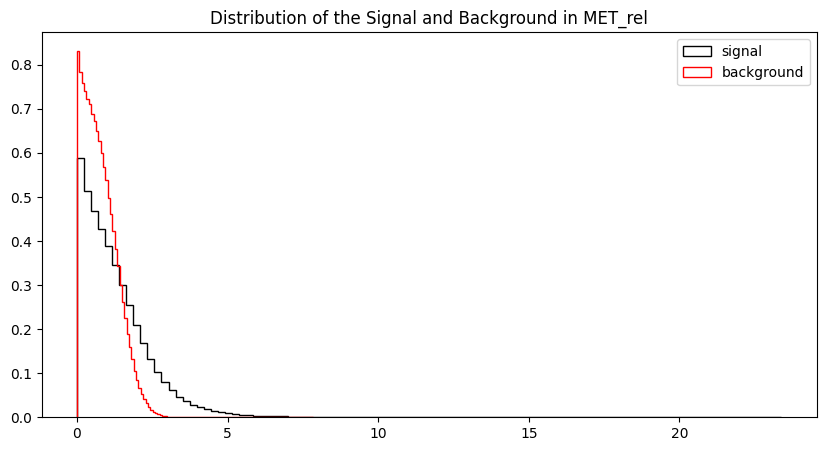

axial_MET


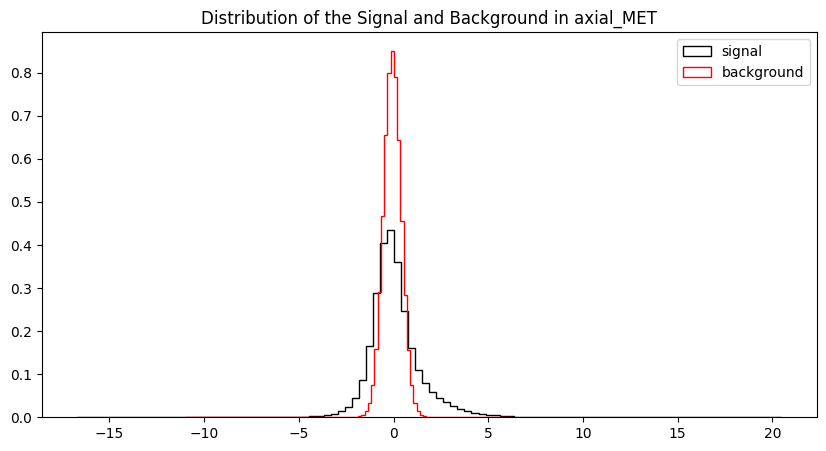

M_R


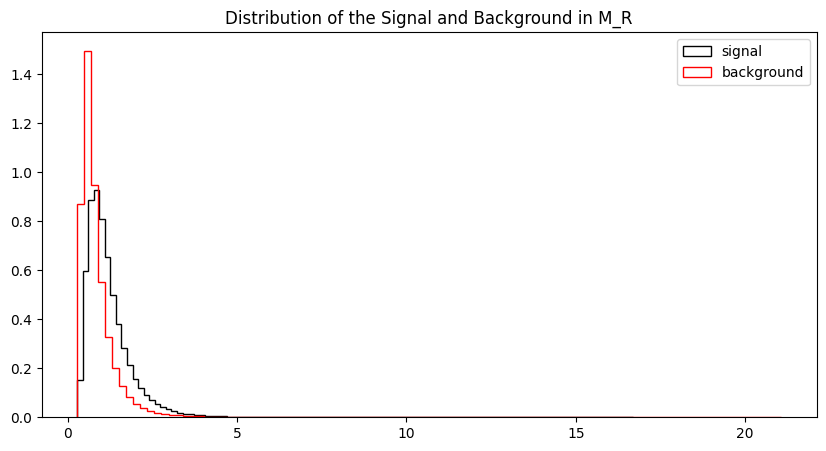

M_TR_2


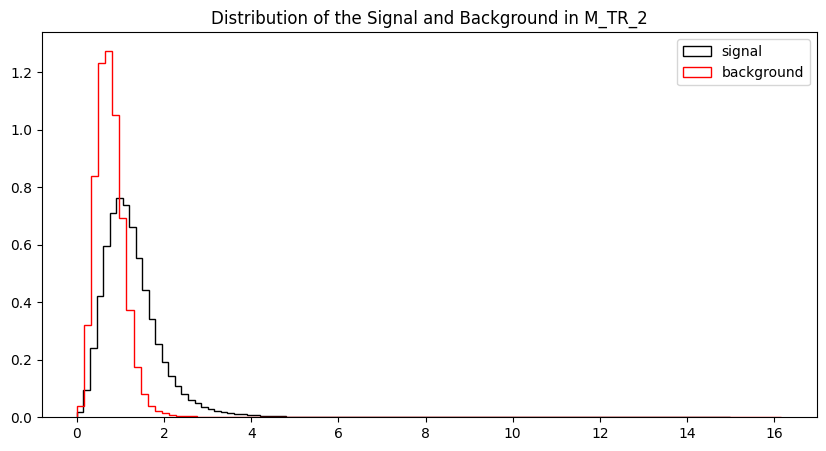

R


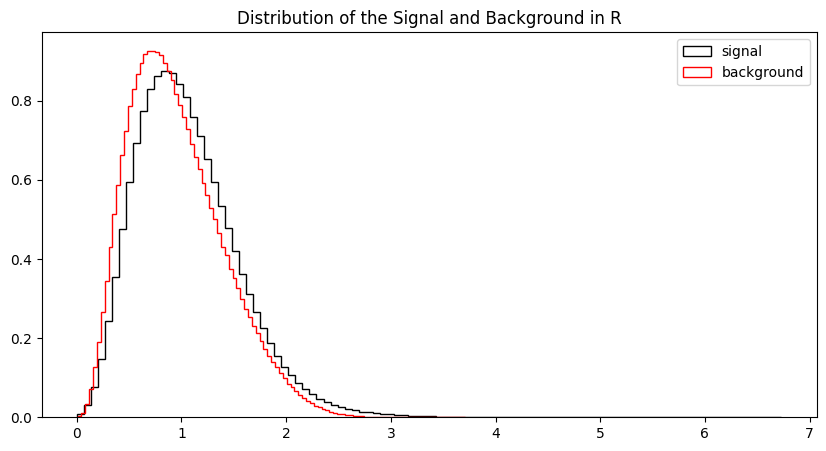

MT2


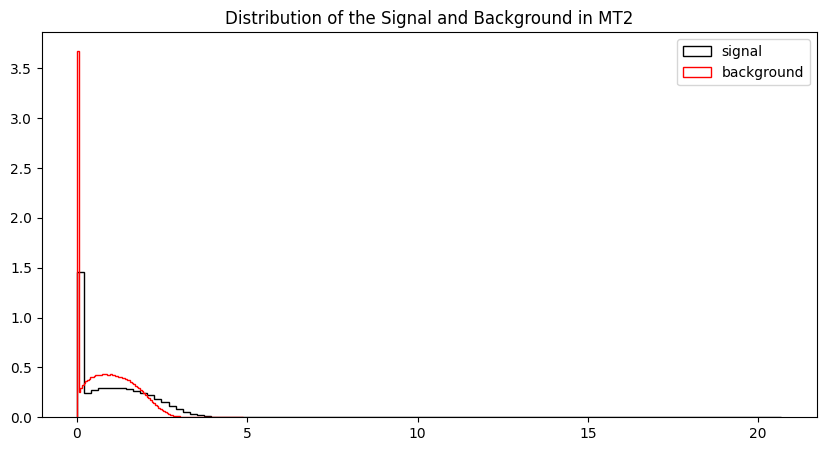

S_R


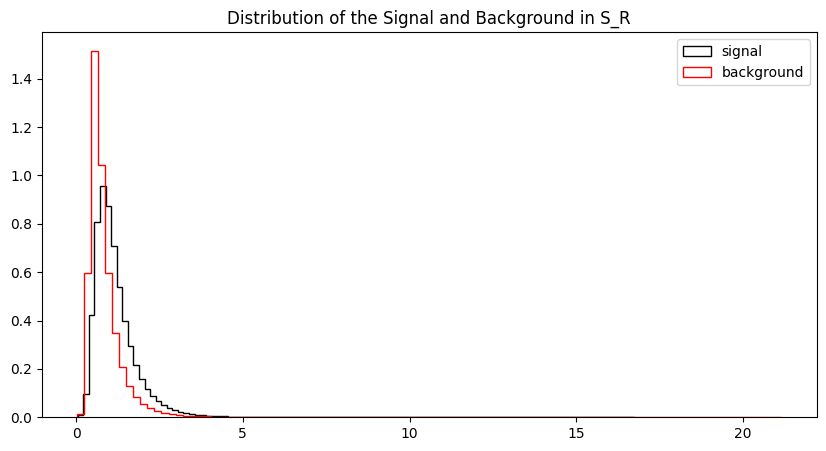

M_Delta_R


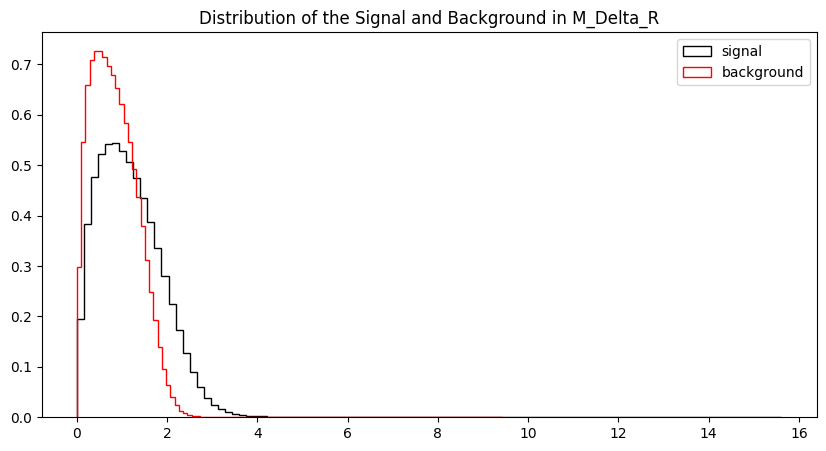

dPhi_r_b


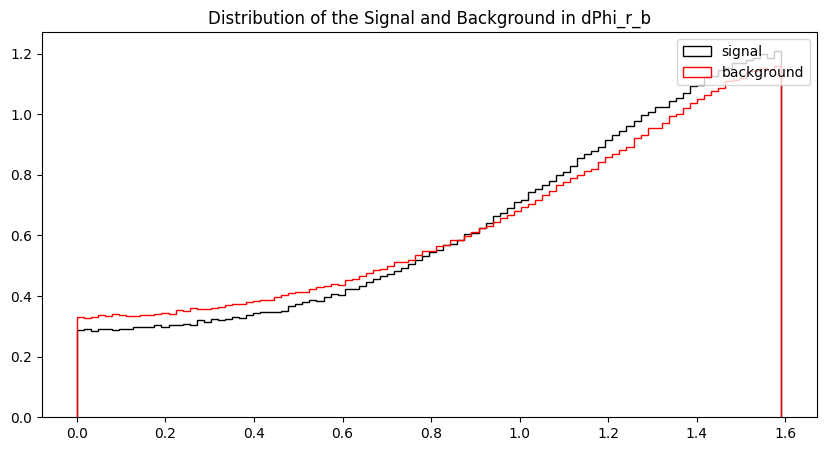

cos_theta_r1


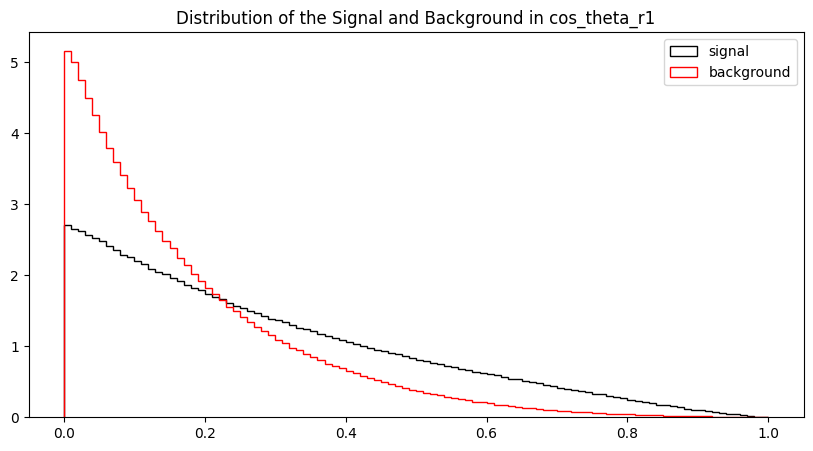

signal


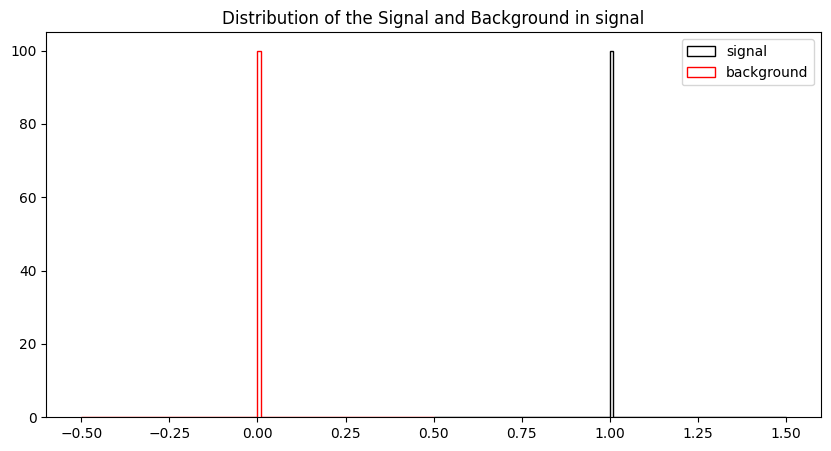

In [16]:
#### Making Fig 6- high-level input feature 
###Creating a data frame with just the high-level input features
df_high = df[['MET_rel', 'axial_MET', 'M_R', 'M_TR_2',
       'R', 'MT2', 'S_R', 'M_Delta_R', 'dPhi_r_b', 'cos_theta_r1', 'signal']]
### Plotting the histograms of the high-level features with the sig/bkg distribution
for col in df_high.columns:
    print (col)
    plt.figure(figsize=(10,5))
    plt.hist(np.array(df_sig[col]),bins=100,histtype="step",
             color="black",label="signal",density=1, stacked=True)
    plt.hist(np.array(df_bkg[col]),bins=100,histtype="step", 
             color="red", label="background",density=1, stacked=True)
    plt.title(f"Distribution of the Signal and Background in {col}")
    plt.legend(loc='upper right')
    plt.show()

## Exercise 4: Correlation

### Exercise 4.1

#### Part a
Write a function that creates pair plots and use it to compare variables in the SUSY and Higgs samples, separately for low and high-level features. Refer to Lecture 13 for details. Do not use `seaborn`.

#### Part b
Making these plots can be slow because creating each plot initiates a full loop over the data. Make at least one modification to your function in part a to speed it up. Can you propose a different method of creating histograms that would speed up making such pair plots?

#### Part c

Which observables appear to be best for separating signal from background?

**PART A - SOLUTION**

In [17]:
### Referring to the lecture 
def compare_distributions(df,col_name,selections,**kwargs):
    for label,selection in selections.items():        
        _=plt.hist(df[selection][col_name],label=label,**kwargs)

    _=plt.legend()

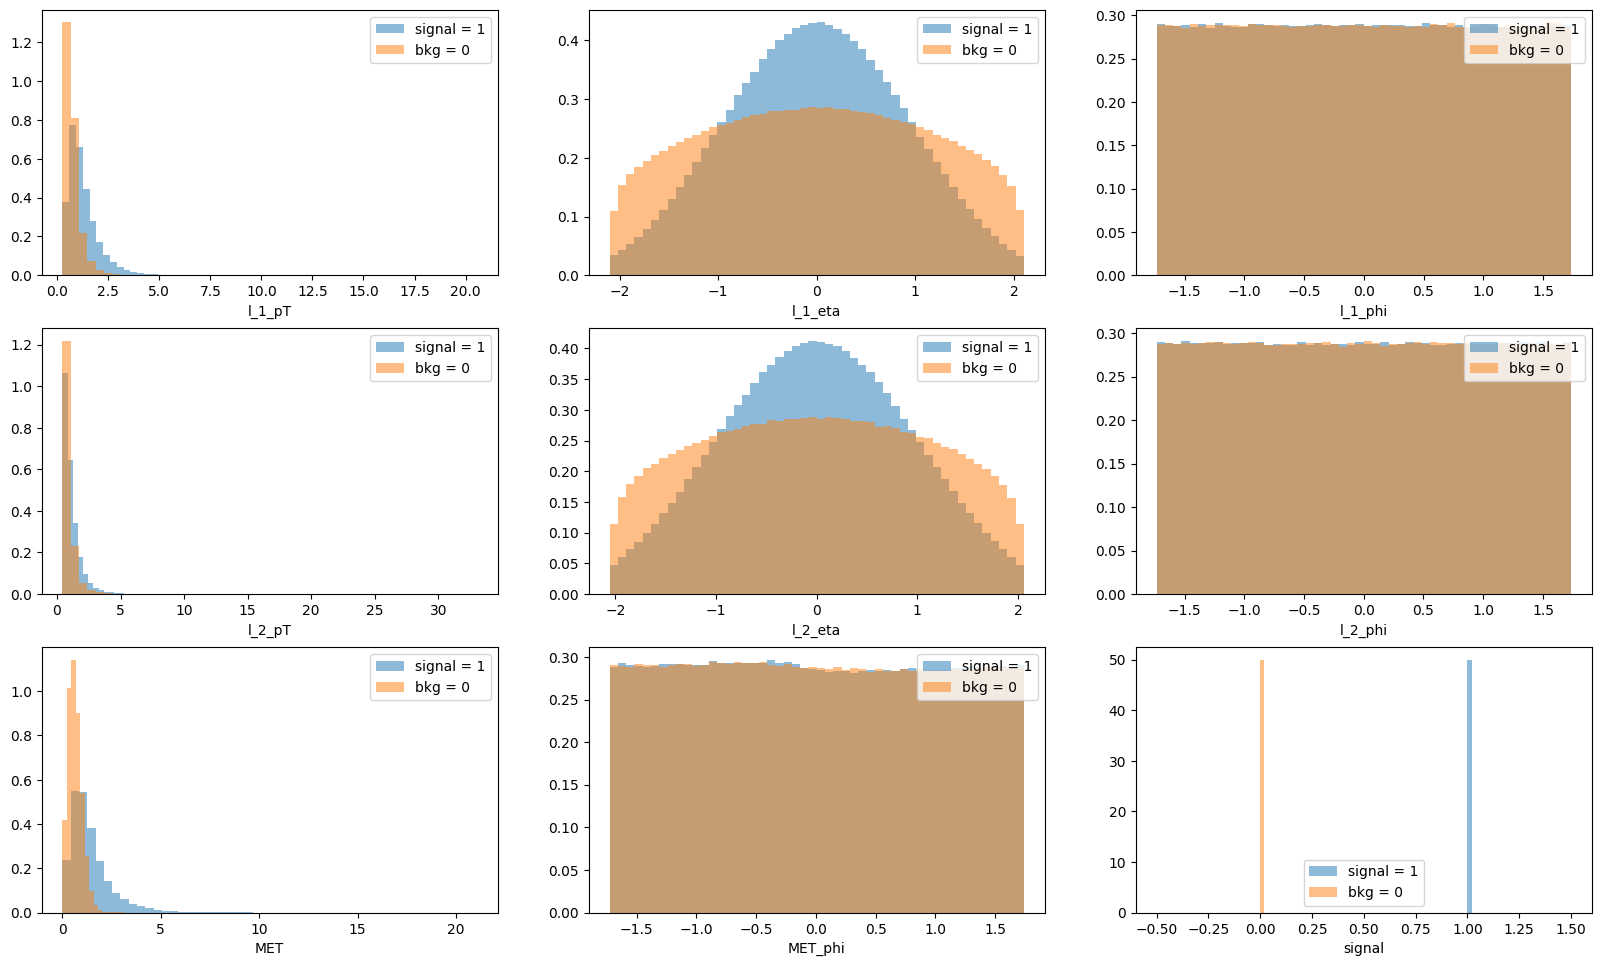

In [18]:
#df_sig=df[df.signal==1] , df_bkg=df[df.signal==0]
### Creating pair plots for the low-level feature
process_dict={"signal = 1" : df['signal']==1 , "bkg = 0" : df['signal']==0}
plt.figure(figsize=(20,20))
for i, col_name in enumerate(df_low.columns):
    plt.subplot(5,3,i+1)
    compare_distributions(df_low, col_name, process_dict,
                          alpha=0.5, density=1, bins=50, stacked=True)
    plt.xlabel(col_name)
plt.show()

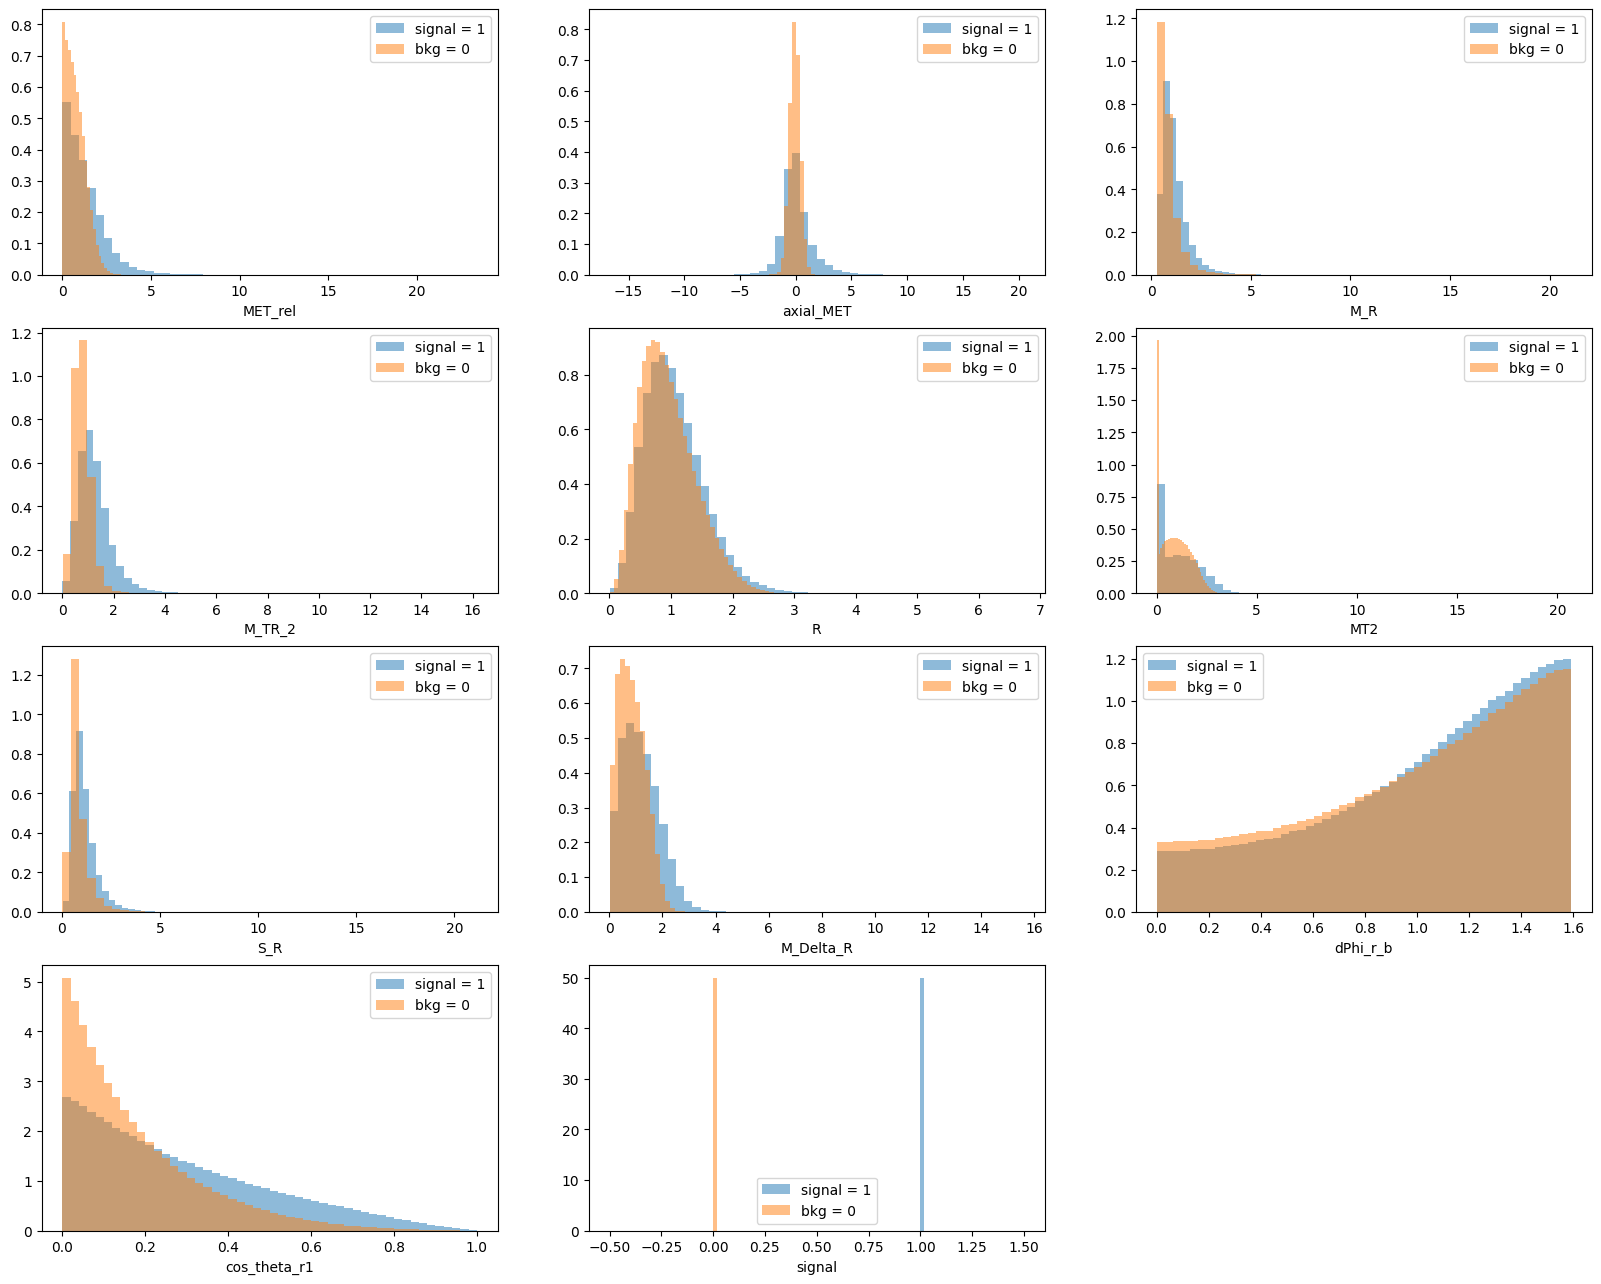

In [19]:
#### For the high-level feature 
plt.figure(figsize=(20,20))
for i, col_name in enumerate(df_high.columns):
    plt.subplot(5,3,i+1)
    compare_distributions(df_high, col_name, process_dict, alpha=0.5, density=1, bins=50, stacked=True)
    plt.xlabel(col_name)
plt.show()

**PART B-SOLUTION**

In [20]:
#### Making code efficiency- by giving it more parameters 
def compare_plot(df, col_name, selections, bins=100, histtype=True):
    for label, selection in selections.items():
        _ = plt.hist(df[selection][col_name], bins=bins, histtype=histtype, label=label)
    
    _ = plt.legend()

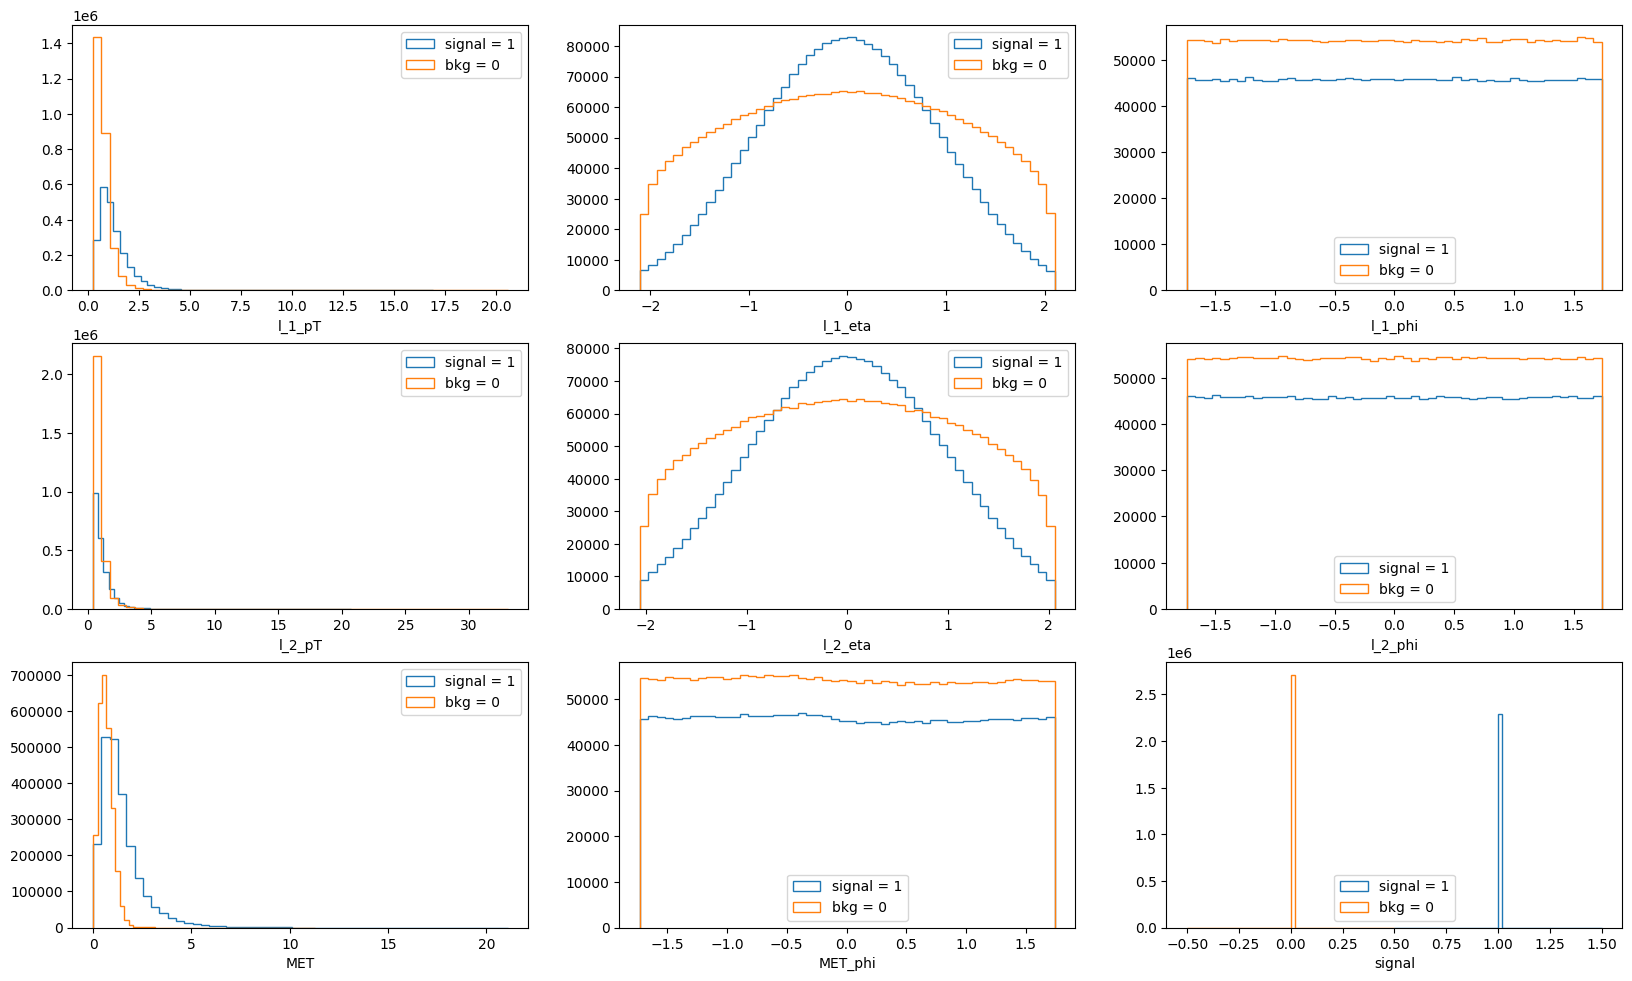

In [21]:
### for low-level feature
plt.figure(figsize=(20,20))
for i, col_name in enumerate(df_low.columns):
    plt.subplot(5,3,i+1)
    compare_plot(df_low, col_name, process_dict, bins=50,histtype='step')
    plt.xlabel(col_name)
plt.show()

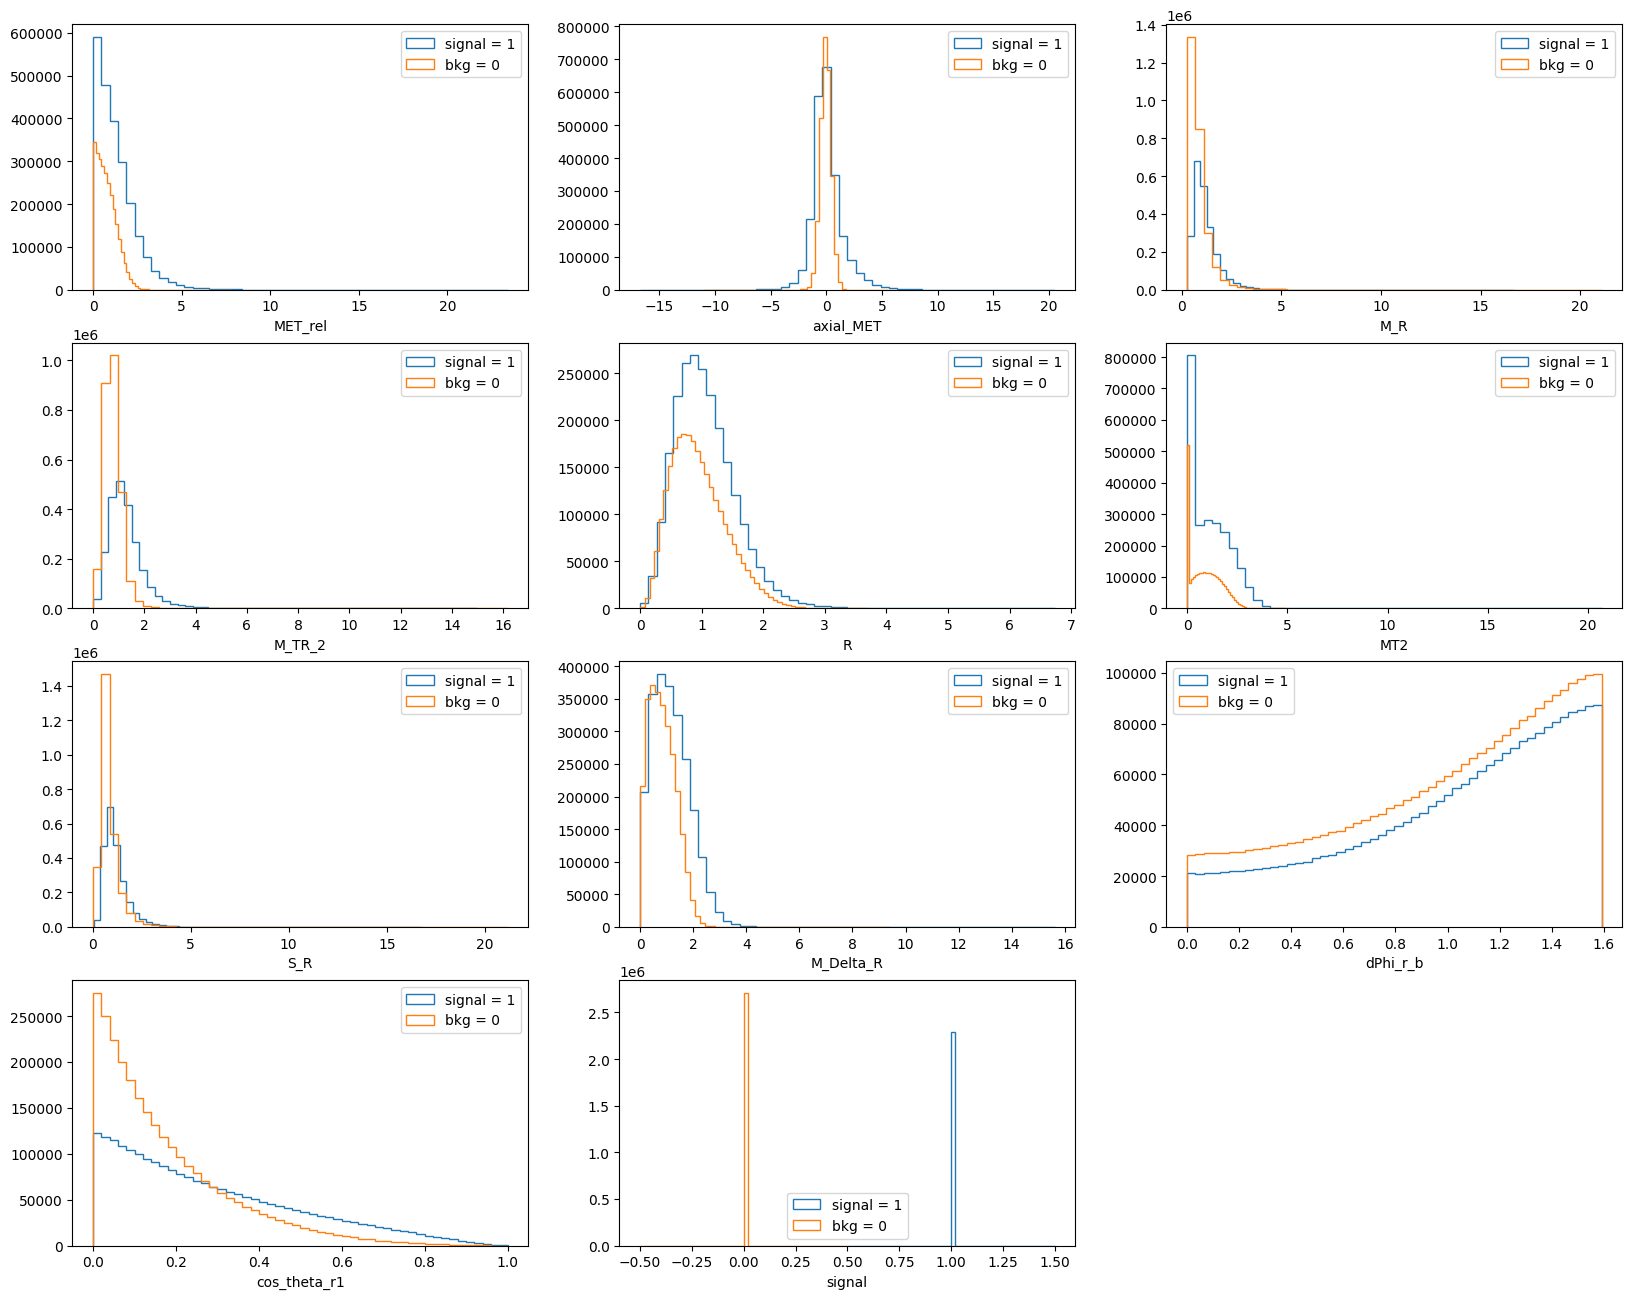

In [22]:
### for high-level feature
plt.figure(figsize=(20,20))
for i, col_name in enumerate(df_high.columns):
    plt.subplot(5,3,i+1)
    compare_plot(df_high, col_name, process_dict, bins=50,histtype='step')
    plt.xlabel(col_name)
plt.show()

**PART C-SOLUTION**

Since the modifications i made was just a few more parameters,  the amount of time it takes for the output of the code to load, it just almost the same

### Exercise 4.2

#### Part a
Install [tabulate](https://github.com/astanin/python-tabulate). 

#### Part b
Use numpy to compute the [covariance matrix](https://numpy.org/doc/stable/reference/generated/numpy.cov.html) and [correlation matrix](https://numpy.org/doc/stable/reference/generated/numpy.corrcoef.html) between all observabes, and separately between low and high-level features.

#### Part c
Use tabulate to create a well formatted table of the covariance and correlation matrices, with nice headings and appropriate significant figures. Embed the table into this notebook.

#### Part d
Write a function that takes a dataset and appropriate arguments and performs steps b and c.  

**PART A-SOLUTION**

### Installing tabulate 
!pip install tabulate

**PART B-SOLUTION**

Extracting the low & high-level features - already extracted
 > df_low = low-level features
> 
 > df_high = high-level features
> 
Computing the covariance  matrix for the low-level features, so we will be using the covariance method to
finding the correlation between the variables 

In [23]:
df_low.shape

(5000000, 9)

In [24]:
### Covariancce matrix function
def compute_cov_matrix(df):
    ### Converting the dataframe to a numpy array 
    df_array = df.to_numpy()
    cov_matrix = np.cov(df_array, rowvar=False) # computing the covaraince matrix 
    return cov_matrix

In [25]:
### Testing solutions
### Sampling the data set of the low-level input feature 
df_lows = df_low.sample(n=10000, random_state = 42)
low_cv= compute_cov_matrix(df_lows)
print('Covariance matrix of the low-level features:')
print(low_cv)

Covariance matrix of the low-level features:
[[ 4.87609782e-01  1.63450293e-03  3.38259687e-03  3.10562437e-01
  -9.34090161e-03  1.49460369e-02  2.56115506e-01 -5.64176132e-03
   1.38447897e-01]
 [ 1.63450293e-03  1.01125330e+00 -1.43420907e-02  4.23114486e-03
   4.04479689e-01 -1.26719867e-02 -1.05371373e-03 -7.30604565e-03
  -2.64414206e-03]
 [ 3.38259687e-03 -1.43420907e-02  1.00955063e+00 -4.04747824e-04
  -2.10806179e-03 -2.60815197e-01  1.39845358e-03 -1.86690204e-01
  -5.37791511e-03]
 [ 3.10562437e-01  4.23114486e-03 -4.04747824e-04  4.40028815e-01
  -1.14706192e-03  8.24135253e-03  9.95536940e-02 -6.27023895e-03
   6.29783333e-02]
 [-9.34090161e-03  4.04479689e-01 -2.10806179e-03 -1.14706192e-03
   1.00415530e+00  2.26798594e-03 -1.86809670e-04  3.99370033e-04
   1.77751320e-03]
 [ 1.49460369e-02 -1.26719867e-02 -2.60815197e-01  8.24135253e-03
   2.26798594e-03  1.00286614e+00  1.93186891e-03 -3.20906911e-02
   3.41533344e-03]
 [ 2.56115506e-01 -1.05371373e-03  1.39845358e-03

In [26]:
### Testing for the high level input feature
df_highs = df_high.sample(n=10000, random_state=42)
high_cv = compute_cov_matrix(df_highs)
print("Covariance matrix of the high level input features:")
print(high_cv)

Covariance matrix of the high level input features:
[[ 0.83128461 -0.11192498  0.06186697  0.32148918  0.24873493  0.41082874
   0.1014218   0.43768627  0.14431529  0.05683932  0.12878298]
 [-0.11192498  1.10812626  0.03039317 -0.16656506 -0.1832521  -0.48139427
  -0.03029879 -0.23248911 -0.02317214 -0.05528589  0.04172756]
 [ 0.06186697  0.03039317  0.40772026  0.22557901 -0.11103748 -0.02916617
   0.39449856  0.08562464 -0.02340111 -0.01387862  0.0869305 ]
 [ 0.32148918 -0.16656506  0.22557901  0.35854152  0.10466357  0.19218194
   0.24405598  0.25620202  0.05906523  0.05290895  0.1263772 ]
 [ 0.24873493 -0.1832521  -0.11103748  0.10466357  0.21901669  0.22825012
  -0.08112887  0.1650556   0.08440365  0.05805942  0.02585087]
 [ 0.41082874 -0.48139427 -0.02916617  0.19218194  0.22825012  0.73356751
  -0.00243424  0.43056054  0.0213901   0.04653567  0.0351145 ]
 [ 0.1014218  -0.03029879  0.39449856  0.24405598 -0.08112887 -0.00243424
   0.39747211  0.1087932   0.00254758 -0.01029196  0

In [27]:
#### Correlation matrix 
def compute_corr_matrix(df):
    df_array = df.to_numpy()
    corr_matrix= np.corrcoef(df_array, rowvar=False)
    return corr_matrix

In [28]:
### For the low-level input features 
low_cr = compute_corr_matrix(df_lows)
print("Correlation matrix of the low level input features:")
print(low_cr)

Correlation matrix of the low level input features:
[[ 1.00000000e+00  2.32765990e-03  4.82114268e-03  6.70458903e-01
  -1.33491050e-02  2.13731416e-02  4.01844442e-01 -8.06998514e-03
   3.97574672e-01]
 [ 2.32765990e-03  1.00000000e+00 -1.41944456e-02  6.34289264e-03
   4.01389771e-01 -1.25832623e-02 -1.14802399e-03 -7.25682479e-03
  -5.27258222e-03]
 [ 4.82114268e-03 -1.41944456e-02  1.00000000e+00 -6.07267321e-04
  -2.09372115e-03 -2.59207375e-01  1.52490328e-03 -1.85588776e-01
  -1.07329336e-02]
 [ 6.70458903e-01  6.34289264e-03 -6.07267321e-04  1.00000000e+00
  -1.72562277e-03  1.24061335e-02  1.64427752e-01 -9.44142971e-03
   1.90379051e-01]
 [-1.33491050e-02  4.01389771e-01 -2.09372115e-03 -1.72562277e-03
   1.00000000e+00  2.26005199e-03 -2.04247716e-04  3.98078995e-04
   3.55697606e-03]
 [ 2.13731416e-02 -1.25832623e-02 -2.59207375e-01  1.24061335e-02
   2.26005199e-03  1.00000000e+00  2.11355945e-03 -3.20075046e-02
   6.83880431e-03]
 [ 4.01844442e-01 -1.14802399e-03  1.52490

In [29]:
high_cr= compute_corr_matrix(df_highs)
print("Correlation matrix of the high level input features:")
print(high_cr)

Correlation matrix of the high level input features:
[[ 1.         -0.11661584  0.10626808  0.58887316  0.58293925  0.52609709
   0.17644247  0.75623915  0.36605015  0.31443463  0.28323841]
 [-0.11661584  1.          0.04521684 -0.26425277 -0.3719767  -0.53393237
  -0.04565385 -0.34791976 -0.05090667 -0.26489638  0.07948715]
 [ 0.10626808  0.04521684  1.          0.58999431 -0.37157788 -0.05333081
   0.97996586  0.21124612 -0.08475364 -0.10962802  0.27299807]
 [ 0.58887316 -0.26425277  0.58999431  1.          0.37349709  0.37473374
   0.64649682  0.67403731  0.228121    0.44567247  0.42322134]
 [ 0.58293925 -0.3719767  -0.37157788  0.37349709  1.          0.56944575
  -0.27496886  0.55560069  0.41708613  0.62573499  0.11076563]
 [ 0.52609709 -0.53393237 -0.05333081  0.37473374  0.56944575  1.
  -0.00450807  0.79192726  0.05775583  0.27404526  0.08221197]
 [ 0.17644247 -0.04565385  0.97996586  0.64649682 -0.27496886 -0.00450807
   1.          0.27184386  0.00934497 -0.08233817  0.262004

**PART C-SOLUTION**

Hint: Example code for embedding a `tabulate` table into a notebook:

In [30]:
from IPython.display import HTML, display
import tabulate
table = [["A",1,2],
        ["C",3,4],
        ["D",5,6]]
display(HTML(tabulate.tabulate(table, tablefmt='html', headers=["X","Y","Z"])))

X,Y,Z
A,1,2
C,3,4
D,5,6


**Covariance Matric-Tabular format**

In [42]:
### For the low-level input features 
from tabulate import tabulate as tab
col_names = df_lows.columns.tolist()  # retrieves the col_names of the df as a python list 
display(HTML(tab(low_cv, tablefmt='html', headers=col_names)))

l_1_pT,l_1_eta,l_1_phi,l_2_pT,l_2_eta,l_2_phi,MET,MET_phi,signal
0.48761,0.0016345,0.0033826,0.310562,-0.0093409,0.014946,0.256116,-0.00564176,0.138448
0.0016345,1.01125,-0.0143421,0.00423114,0.40448,-0.012672,-0.00105371,-0.00730605,-0.00264414
0.0033826,-0.0143421,1.00955,-0.000404748,-0.00210806,-0.260815,0.00139845,-0.18669,-0.00537792
0.310562,0.00423114,-0.000404748,0.440029,-0.00114706,0.00824135,0.0995537,-0.00627024,0.0629783
-0.0093409,0.40448,-0.00210806,-0.00114706,1.00416,0.00226799,-0.00018681,0.00039937,0.00177751
0.014946,-0.012672,-0.260815,0.00824135,0.00226799,1.00287,0.00193187,-0.0320907,0.00341533
0.256116,-0.00105371,0.00139845,0.0995537,-0.00018681,0.00193187,0.833074,-0.00688706,0.196323
-0.00564176,-0.00730605,-0.18669,-0.00627024,0.00039937,-0.0320907,-0.00688706,1.00233,-0.00346877
0.138448,-0.00264414,-0.00537792,0.0629783,0.00177751,0.00341533,0.196323,-0.00346877,0.248693


In [39]:
#### For high level input features
col_names = df_highs.columns.tolist()  # retrieves the col_names of the df as a python list 
display(HTML(tab(high_cv, tablefmt='html', headers=col_names)))

MET_rel,axial_MET,M_R,M_TR_2,R,MT2,S_R,M_Delta_R,dPhi_r_b,cos_theta_r1,signal
0.831285,-0.111925,0.061867,0.321489,0.248735,0.410829,0.101422,0.437686,0.144315,0.0568393,0.128783
-0.111925,1.10813,0.0303932,-0.166565,-0.183252,-0.481394,-0.0302988,-0.232489,-0.0231721,-0.0552859,0.0417276
0.061867,0.0303932,0.40772,0.225579,-0.111037,-0.0291662,0.394499,0.0856246,-0.0234011,-0.0138786,0.0869305
0.321489,-0.166565,0.225579,0.358542,0.104664,0.192182,0.244056,0.256202,0.0590652,0.052909,0.126377
0.248735,-0.183252,-0.111037,0.104664,0.219017,0.22825,-0.0811289,0.165056,0.0844037,0.0580594,0.0258509
0.410829,-0.481394,-0.0291662,0.192182,0.22825,0.733568,-0.00243424,0.430561,0.0213901,0.0465357,0.0351145
0.101422,-0.0302988,0.394499,0.244056,-0.0811289,-0.00243424,0.397472,0.108793,0.00254758,-0.010292,0.0823746
0.437686,-0.232489,0.0856246,0.256202,0.165056,0.430561,0.108793,0.402956,0.0436748,0.0408693,0.0877459
0.144315,-0.0231721,-0.0234011,0.0590652,0.0844037,0.0213901,0.00254758,0.0436748,0.186979,0.00731249,0.00686549
0.0568393,-0.0552859,-0.0138786,0.052909,0.0580594,0.0465357,-0.010292,0.0408693,0.00731249,0.0393086,0.0276375


**Correlation Matrix - Tabular Format**

In [44]:
#### For low-level input features
col_names = df_lows.columns.tolist()  # retrieves the col_names of the df as a python list
display(HTML(tab(low_cr, tablefmt='html', headers=col_names)))

l_1_pT,l_1_eta,l_1_phi,l_2_pT,l_2_eta,l_2_phi,MET,MET_phi,signal
1,0.00232766,0.00482114,0.670459,-0.0133491,0.0213731,0.401844,-0.00806999,0.397575
0.00232766,1,-0.0141944,0.00634289,0.40139,-0.0125833,-0.00114802,-0.00725682,-0.00527258
0.00482114,-0.0141944,1,-0.000607267,-0.00209372,-0.259207,0.0015249,-0.185589,-0.0107329
0.670459,0.00634289,-0.000607267,1,-0.00172562,0.0124061,0.164428,-0.00944143,0.190379
-0.0133491,0.40139,-0.00209372,-0.00172562,1,0.00226005,-0.000204248,0.000398079,0.00355698
0.0213731,-0.0125833,-0.259207,0.0124061,0.00226005,1,0.00211356,-0.0320075,0.0068388
0.401844,-0.00114802,0.0015249,0.164428,-0.000204248,0.00211356,1,-0.00753679,0.431317
-0.00806999,-0.00725682,-0.185589,-0.00944143,0.000398079,-0.0320075,-0.00753679,1,-0.00694765
0.397575,-0.00527258,-0.0107329,0.190379,0.00355698,0.0068388,0.431317,-0.00694765,1


In [34]:
#### For high-level input features
col_names = df_highs.columns.tolist()  # retrieves the col_names of the df as a python list 
display(HTML(tab(high_cr, tablefmt='html', headers=col_names)))

MET_rel,axial_MET,M_R,M_TR_2,R,MT2,S_R,M_Delta_R,dPhi_r_b,cos_theta_r1,signal
1,-0.116616,0.106268,0.588873,0.582939,0.526097,0.176442,0.756239,0.36605,0.314435,0.283238
-0.116616,1,0.0452168,-0.264253,-0.371977,-0.533932,-0.0456538,-0.34792,-0.0509067,-0.264896,0.0794871
0.106268,0.0452168,1,0.589994,-0.371578,-0.0533308,0.979966,0.211246,-0.0847536,-0.109628,0.272998
0.588873,-0.264253,0.589994,1,0.373497,0.374734,0.646497,0.674037,0.228121,0.445672,0.423221
0.582939,-0.371977,-0.371578,0.373497,1,0.569446,-0.274969,0.555601,0.417086,0.625735,0.110766
0.526097,-0.533932,-0.0533308,0.374734,0.569446,1,-0.00450807,0.791927,0.0577558,0.274045,0.082212
0.176442,-0.0456538,0.979966,0.646497,-0.274969,-0.00450807,1,0.271844,0.00934497,-0.0823382,0.262004
0.756239,-0.34792,0.211246,0.674037,0.555601,0.791927,0.271844,1,0.159113,0.324732,0.277183
0.36605,-0.0509067,-0.0847536,0.228121,0.417086,0.0577558,0.00934497,0.159113,1,0.0852952,0.0318378
0.314435,-0.264896,-0.109628,0.445672,0.625735,0.274045,-0.0823382,0.324732,0.0852952,1,0.279527


**PART D-SOLUTION**

In [35]:
### Function that computes both the covariance and correlation matrix at the same time
def compute_matrices(df):
    ## Computing the covariance matrix 
    cov_matrix = compute_cov_matrix(df)
    # Computing the corr_matrix
    corr_matrix = compute_corr_matrix(df)
    # Getting the columns  as a list 
    col_names = df.columns.tolist()
    ## Displaying the  covariance matrix 
    print("Covariance matrix:")
    display(HTML(tab(cov_matrix, tablefmt='html', headers= col_names)))
    ## Displaying the correlation matrix 
    print("Correlation matrix:")
    display(HTML(tab(corr_matrix, tablefmt='html', headers= col_names)))

In [36]:
### Covariance and correlation matrix for the low_level feature 
compute_matrices(df_lows)

Covariance matrix:


l_1_pT,l_1_eta,l_1_phi,l_2_pT,l_2_eta,l_2_phi,MET,MET_phi,signal
0.48761,0.0016345,0.0033826,0.310562,-0.0093409,0.014946,0.256116,-0.00564176,0.138448
0.0016345,1.01125,-0.0143421,0.00423114,0.40448,-0.012672,-0.00105371,-0.00730605,-0.00264414
0.0033826,-0.0143421,1.00955,-0.000404748,-0.00210806,-0.260815,0.00139845,-0.18669,-0.00537792
0.310562,0.00423114,-0.000404748,0.440029,-0.00114706,0.00824135,0.0995537,-0.00627024,0.0629783
-0.0093409,0.40448,-0.00210806,-0.00114706,1.00416,0.00226799,-0.00018681,0.00039937,0.00177751
0.014946,-0.012672,-0.260815,0.00824135,0.00226799,1.00287,0.00193187,-0.0320907,0.00341533
0.256116,-0.00105371,0.00139845,0.0995537,-0.00018681,0.00193187,0.833074,-0.00688706,0.196323
-0.00564176,-0.00730605,-0.18669,-0.00627024,0.00039937,-0.0320907,-0.00688706,1.00233,-0.00346877
0.138448,-0.00264414,-0.00537792,0.0629783,0.00177751,0.00341533,0.196323,-0.00346877,0.248693


Correlation matrix:


l_1_pT,l_1_eta,l_1_phi,l_2_pT,l_2_eta,l_2_phi,MET,MET_phi,signal
1,0.00232766,0.00482114,0.670459,-0.0133491,0.0213731,0.401844,-0.00806999,0.397575
0.00232766,1,-0.0141944,0.00634289,0.40139,-0.0125833,-0.00114802,-0.00725682,-0.00527258
0.00482114,-0.0141944,1,-0.000607267,-0.00209372,-0.259207,0.0015249,-0.185589,-0.0107329
0.670459,0.00634289,-0.000607267,1,-0.00172562,0.0124061,0.164428,-0.00944143,0.190379
-0.0133491,0.40139,-0.00209372,-0.00172562,1,0.00226005,-0.000204248,0.000398079,0.00355698
0.0213731,-0.0125833,-0.259207,0.0124061,0.00226005,1,0.00211356,-0.0320075,0.0068388
0.401844,-0.00114802,0.0015249,0.164428,-0.000204248,0.00211356,1,-0.00753679,0.431317
-0.00806999,-0.00725682,-0.185589,-0.00944143,0.000398079,-0.0320075,-0.00753679,1,-0.00694765
0.397575,-0.00527258,-0.0107329,0.190379,0.00355698,0.0068388,0.431317,-0.00694765,1


In [37]:
### Covariance and correlation matrix for the high level features 
compute_matrices(df_highs)

Covariance matrix:


MET_rel,axial_MET,M_R,M_TR_2,R,MT2,S_R,M_Delta_R,dPhi_r_b,cos_theta_r1,signal
0.831285,-0.111925,0.061867,0.321489,0.248735,0.410829,0.101422,0.437686,0.144315,0.0568393,0.128783
-0.111925,1.10813,0.0303932,-0.166565,-0.183252,-0.481394,-0.0302988,-0.232489,-0.0231721,-0.0552859,0.0417276
0.061867,0.0303932,0.40772,0.225579,-0.111037,-0.0291662,0.394499,0.0856246,-0.0234011,-0.0138786,0.0869305
0.321489,-0.166565,0.225579,0.358542,0.104664,0.192182,0.244056,0.256202,0.0590652,0.052909,0.126377
0.248735,-0.183252,-0.111037,0.104664,0.219017,0.22825,-0.0811289,0.165056,0.0844037,0.0580594,0.0258509
0.410829,-0.481394,-0.0291662,0.192182,0.22825,0.733568,-0.00243424,0.430561,0.0213901,0.0465357,0.0351145
0.101422,-0.0302988,0.394499,0.244056,-0.0811289,-0.00243424,0.397472,0.108793,0.00254758,-0.010292,0.0823746
0.437686,-0.232489,0.0856246,0.256202,0.165056,0.430561,0.108793,0.402956,0.0436748,0.0408693,0.0877459
0.144315,-0.0231721,-0.0234011,0.0590652,0.0844037,0.0213901,0.00254758,0.0436748,0.186979,0.00731249,0.00686549
0.0568393,-0.0552859,-0.0138786,0.052909,0.0580594,0.0465357,-0.010292,0.0408693,0.00731249,0.0393086,0.0276375


Correlation matrix:


MET_rel,axial_MET,M_R,M_TR_2,R,MT2,S_R,M_Delta_R,dPhi_r_b,cos_theta_r1,signal
1,-0.116616,0.106268,0.588873,0.582939,0.526097,0.176442,0.756239,0.36605,0.314435,0.283238
-0.116616,1,0.0452168,-0.264253,-0.371977,-0.533932,-0.0456538,-0.34792,-0.0509067,-0.264896,0.0794871
0.106268,0.0452168,1,0.589994,-0.371578,-0.0533308,0.979966,0.211246,-0.0847536,-0.109628,0.272998
0.588873,-0.264253,0.589994,1,0.373497,0.374734,0.646497,0.674037,0.228121,0.445672,0.423221
0.582939,-0.371977,-0.371578,0.373497,1,0.569446,-0.274969,0.555601,0.417086,0.625735,0.110766
0.526097,-0.533932,-0.0533308,0.374734,0.569446,1,-0.00450807,0.791927,0.0577558,0.274045,0.082212
0.176442,-0.0456538,0.979966,0.646497,-0.274969,-0.00450807,1,0.271844,0.00934497,-0.0823382,0.262004
0.756239,-0.34792,0.211246,0.674037,0.555601,0.791927,0.271844,1,0.159113,0.324732,0.277183
0.36605,-0.0509067,-0.0847536,0.228121,0.417086,0.0577558,0.00934497,0.159113,1,0.0852952,0.0318378
0.314435,-0.264896,-0.109628,0.445672,0.625735,0.274045,-0.0823382,0.324732,0.0852952,1,0.279527


## Exercise 5: Selection

### Exercise 5.1

Part a
By looking at the signal/background distributions for each observable (e.g. $x$) determine which selection criteria would be optimal: 

1. $x > x_c$
2. $x < x_c$
3. $|x - \mu| > x_c$
4. $|x - \mu| < x_c$

where $x_c$ is value to be determined below.

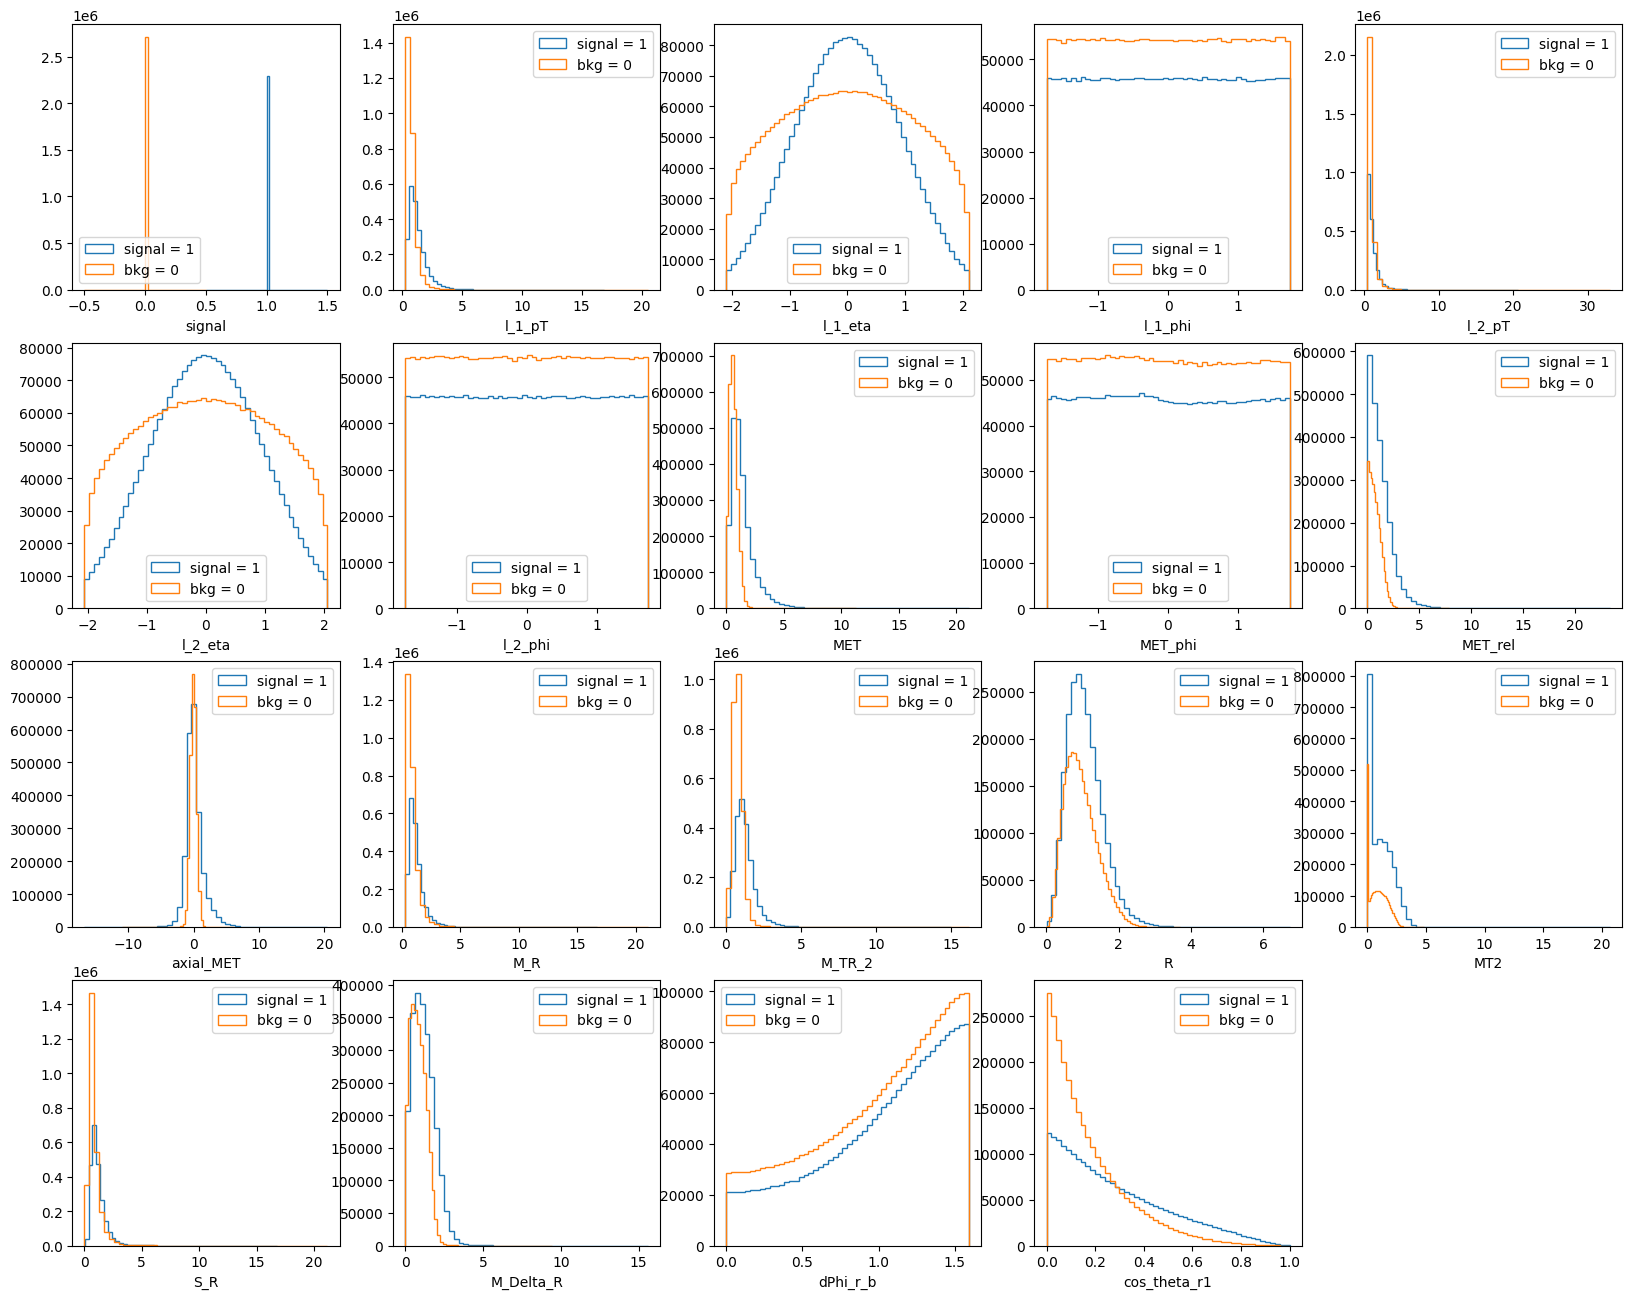

In [54]:
#### Visualizing the the sig/bkg distribution in our variables 
### Plotting the histograms sig/bkg distribution in my df 
plt.figure(figsize=(20,20))
for i, col_name in enumerate(df.columns):
    plt.subplot(5,5,i+1)
    compare_plot(df, col_name, process_dict, bins=50,histtype='step')
    plt.xlabel(col_name)
plt.show()

### Exercise 5.2

Plot the True Positive Rate (TPR) (aka signal efficiency $\epsilon_S(x_c)$) and False Positive Rate (FPR) (aka background efficiency $\epsilon_B(x_c)$) as function of $x_c$ for applying the strategy in part a to each observable. 

### Exercise 5.3
Assume 3 different scenarios corresponding to different numbers of signal and background events expected in data:

1. Expect $N_S=10$, $N_B=100$.
1. Expect $N_S=100$, $N_B=1000$.
1. Expect $N_S=1000$, $N_B=10000$.
1. Expect $N_S=10000$, $N_B=100000$.

Plot the significance ($\sigma_{S'}$) for each observable as function of $x_c$ for each scenario, where 

$\sigma_{S'}= \frac{N'_S}{\sqrt{N'_S+N'_B}}$

and $N'_{S,B} = \epsilon_{S,B}(x_c) * N_{S,B}$.

## Exercise 6: Cut Flow


### Exercise 6.1

For each above scenario, choose a subset (minumum 3) of observables to use for selections, and values of $x_c$ based on your significance plots (part 3c). 

### Exercise 6.2
Create a "cut-flow" table for each scenario where you successively make the selections on each observable and tabulate $\epsilon_S$, $\epsilon_B$, $N'_S$, $N'_B$, and $\sigma_{S'}$.

### Exercise 6.3
In 3c above you computed the significance for each observable assuming to make no other selections on any other observable. If the variables are correlated, then this assumption can lead to non-optimial results when selecting on multiple variables. By looking at the correlation matrices and your answers to 4b, identify where this effect could be most detrimental to the significance. Attempt to correct the issue by applying the selection in one observable and then optimizing (part 3c) for a second observable. What happens if you change the order of your selection (make selection on second and optimize on first)?




## Exercise 7: ROC Curves

### Exercise 7.1
For the top 3 observables you identified earlier, create one figure overlaying the Reciever Operating Characteristic (ROC) curves for the 3 observables. Compute the area under the curves and report it in the legend of the figure.

### Exercise 7.2
Write a function that you can use to quickly create the figure in part a with other observables and different conditions. Note that you will likely revise this function as you do the remainder of the lab.

### Exercise 7.3
Use the function from part b to compare the ROC curves for the successive selections in lab 3, exercise 4. Specifically, plot the ROC curve after each selection.

### Exercise 7.4
Use your function and appropriate example to demonstrate the effect (if any) of changing order of the successive selections.



## Exercise 8: Linear Discriminant

### Exercise 8.1

Using numpy, compute the between-class $\bf{S}_B$ and within-class $\bf{S}_W$ covariance matrices defined as:

$$
\bf{S}_B = (\bf{m_2}-\bf{m_1})(\bf{m_2}-\bf{m_1})^T \\
$$
$$
\bf{S}_W = \sum_{i=1,2} \sum_{n=1}^{l_i} (\bf{x}_n^i - \bf{m}_i) (\bf{x}_n^i - \bf{m}_i)^T
$$

where $\bf{m_i}$ are the vectors containing the means for category 1 and 2, here defined as signal and background. Here $\bf{x}_n^i$ is the vector containing the observables for the $n$th example event in category $i$.

### Exercise 8.1

Compute the linear coefficients $\bf{w} = \bf{S_W}^{-1}(\bf{m_2}-\bf{m_1})$. Compare the histogram of the distribution of $F_n^i=\bf{w}^T\bf{x}_n^i$ for the two categories.

### Exercise 8.1

Draw the ROC curve for $F_n$. 

### Exercise 8.1

What is the maximal significance you can obtain in the scenarios in exercise 5? 